In [4]:
# [np.random.uniform(-5, 0) for i in range(4)]
import numpy as np
np.zeros((3, 3, 3,), dtype = np.uint8)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [0]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import pickle
from matplotlib import style
import time
from google.colab.patches import cv2_imshow

style.use("ggplot")

In [0]:
SIZE = 10
HM_EPISODES = 25000
ENEMY_PENALTY = 300
FOOD_REWARD = 25
MOVE_PENALTY = 1

epsilon = 0.9
EPS_DECAY = 0.9998

SHOW_EVERY = 3000

start_q_table = None

LEARNING_RATE = 0.1
DISCOUNT = 0.95

PLAYER_N = 1
FOOD_N = 2
ENEMY_N = 3

d = {1: (255, 175, 0),
    2: (0, 255, 0),
    3: (0, 0, 255)}



on # 0, episolon: 0.9
3000 ep mean nan


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


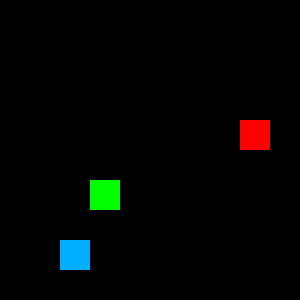

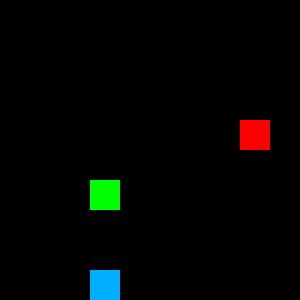

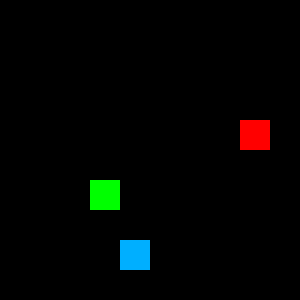

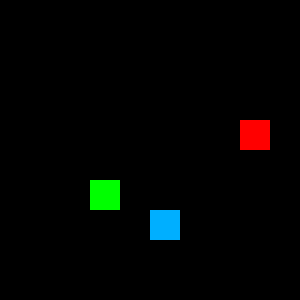

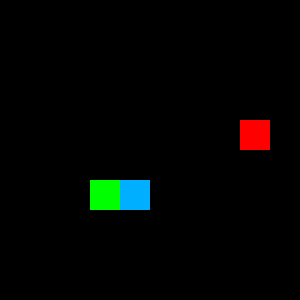

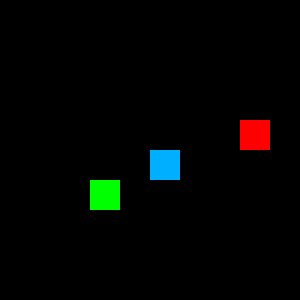

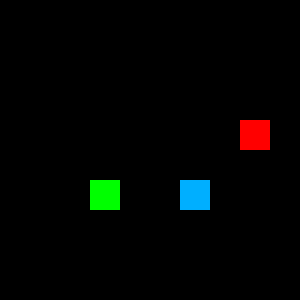

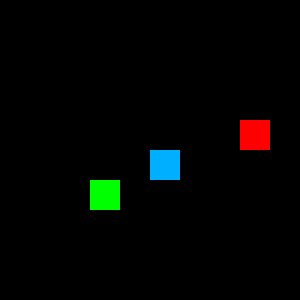

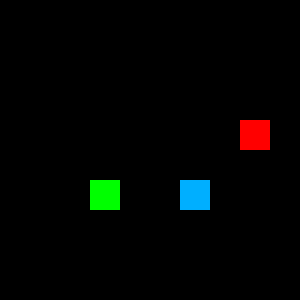

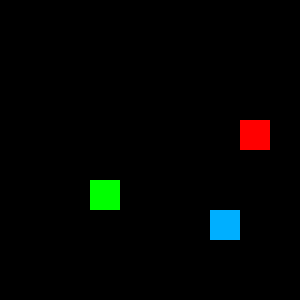

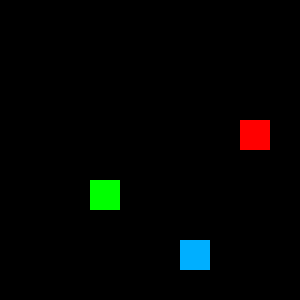

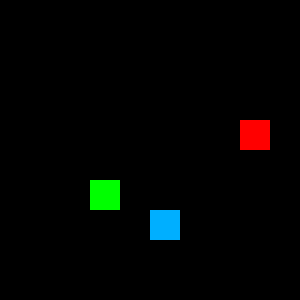

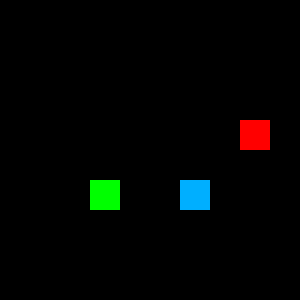

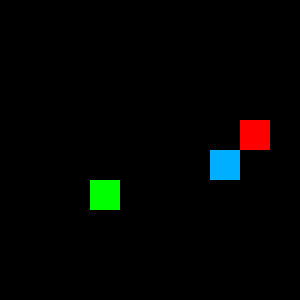

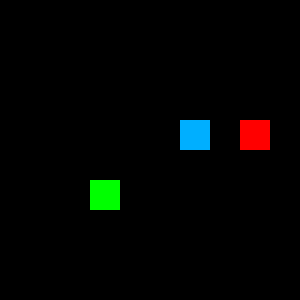

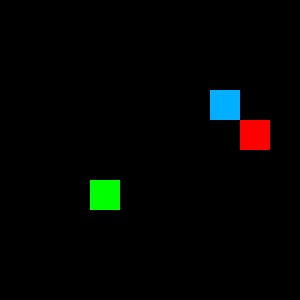

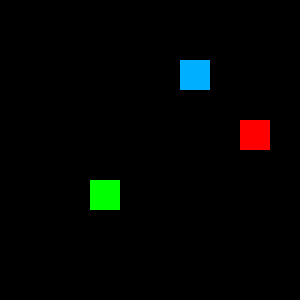

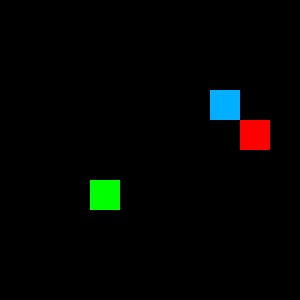

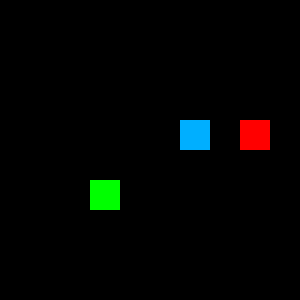

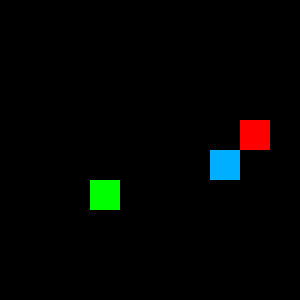

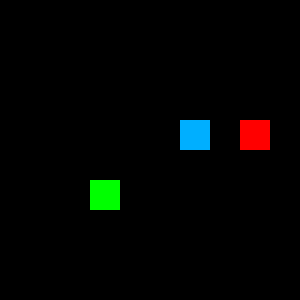

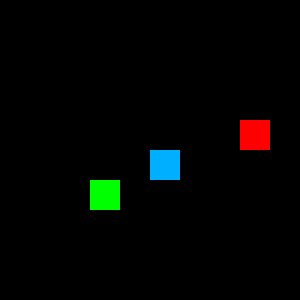

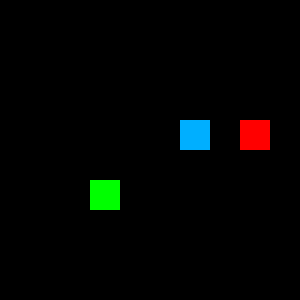

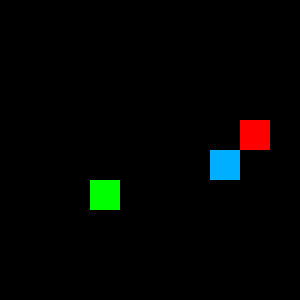

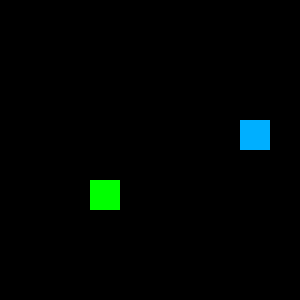

on # 3000, episolon: 0.49390083359356435
3000 ep mean -165.598


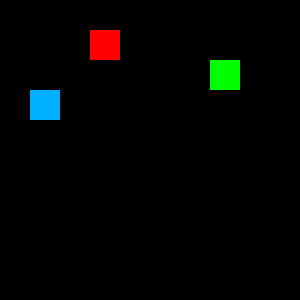

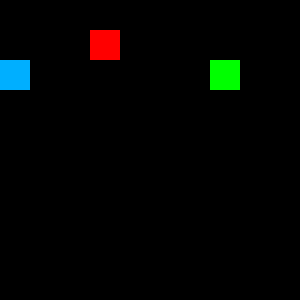

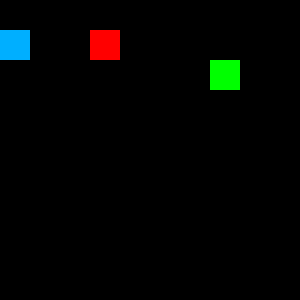

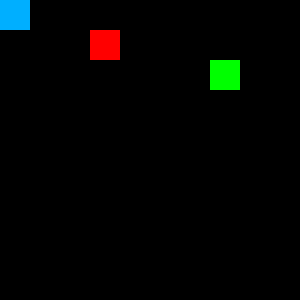

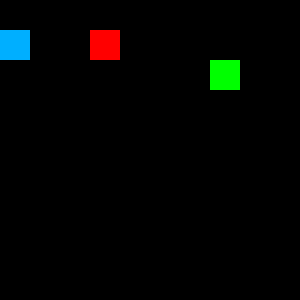

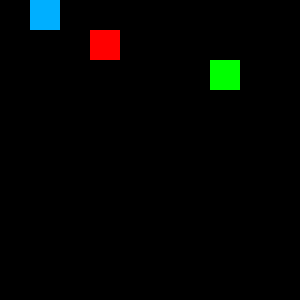

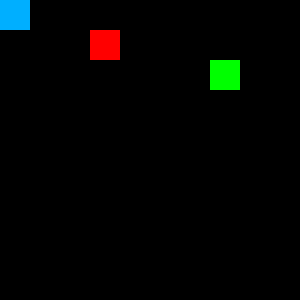

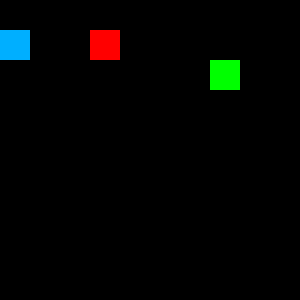

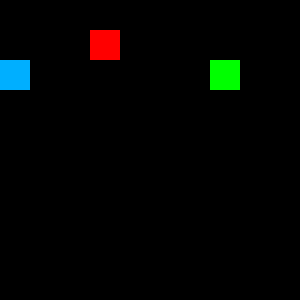

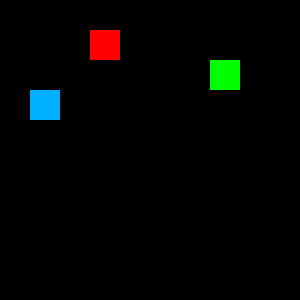

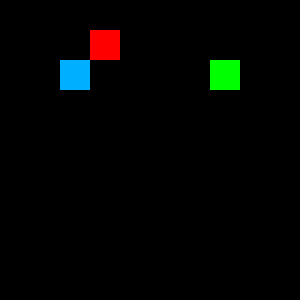

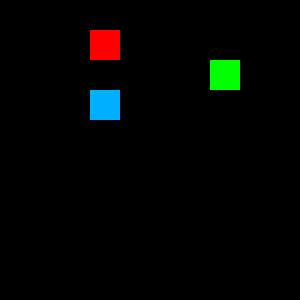

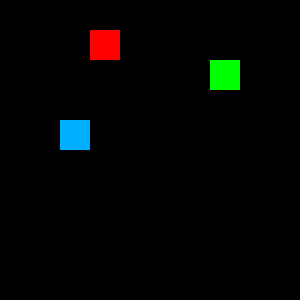

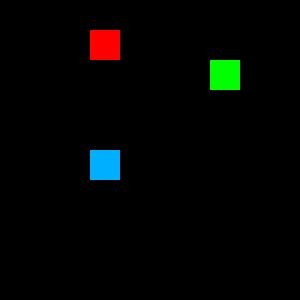

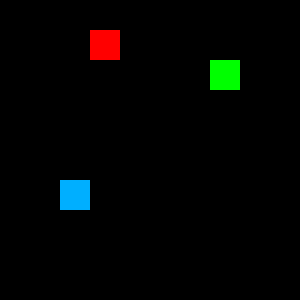

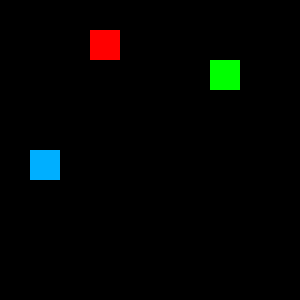

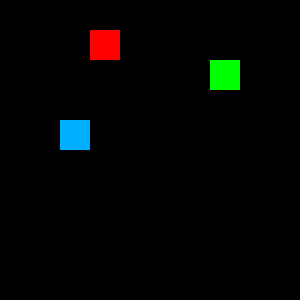

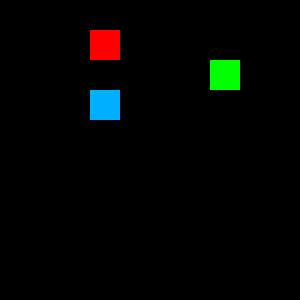

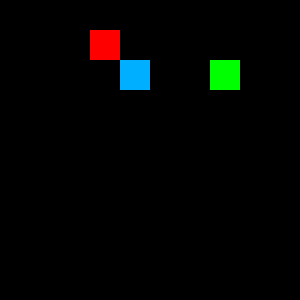

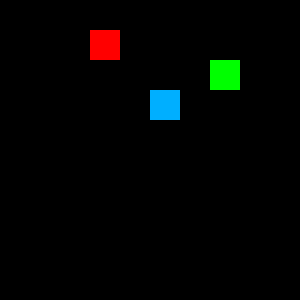

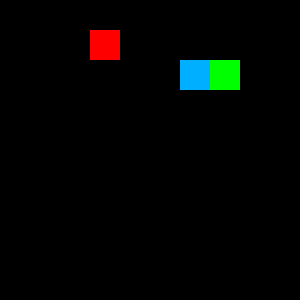

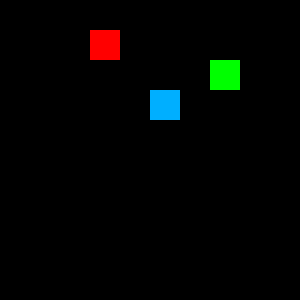

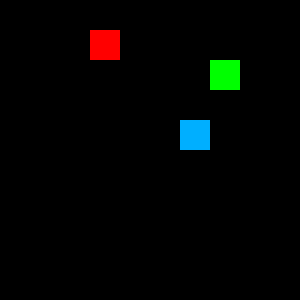

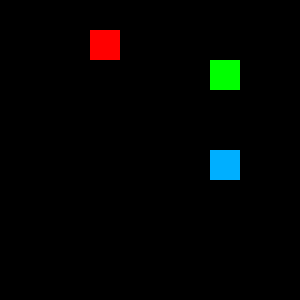

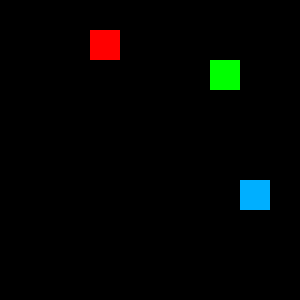

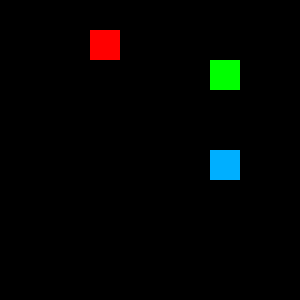

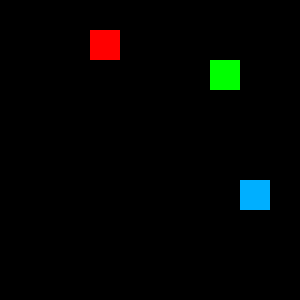

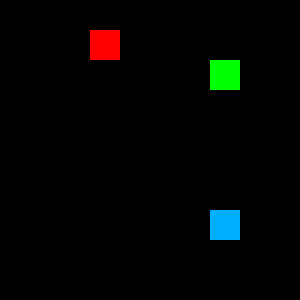

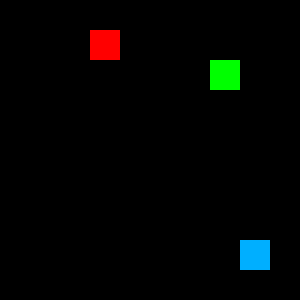

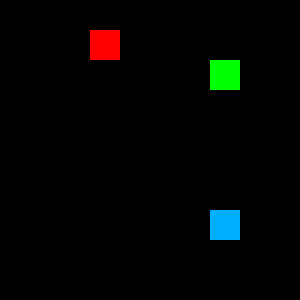

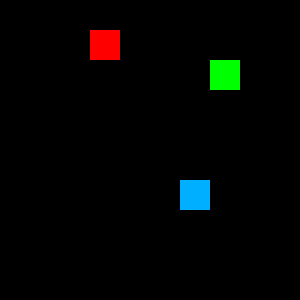

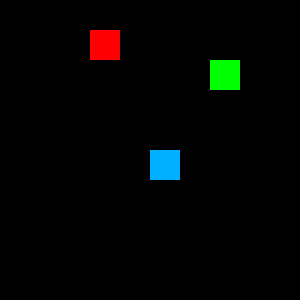

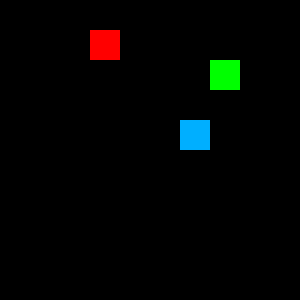

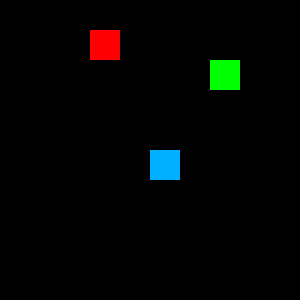

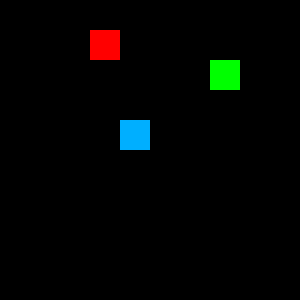

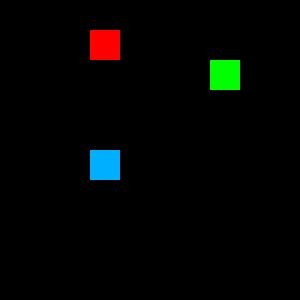

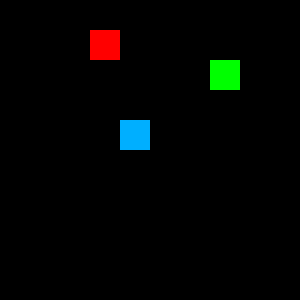

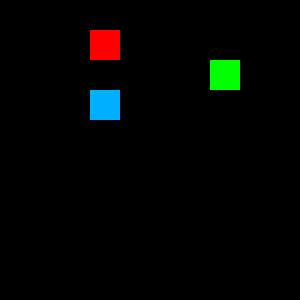

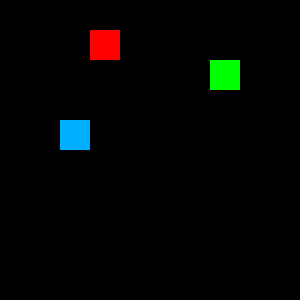

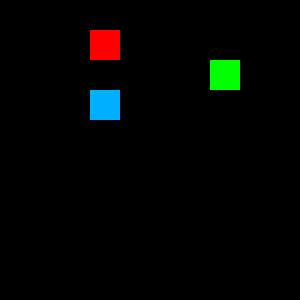

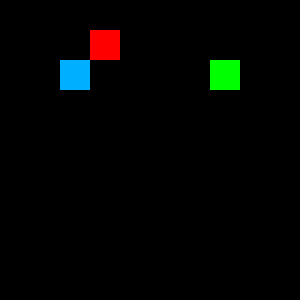

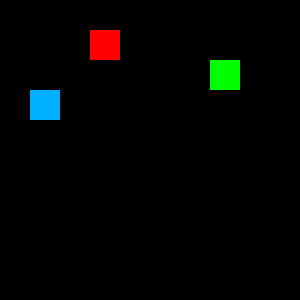

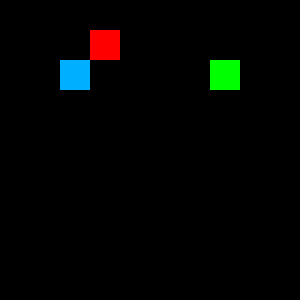

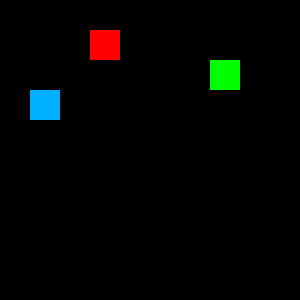

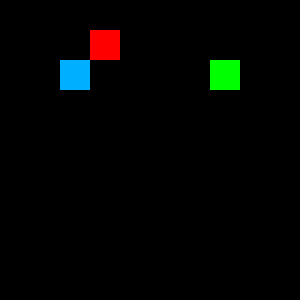

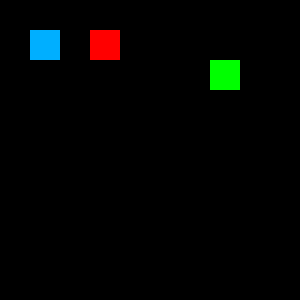

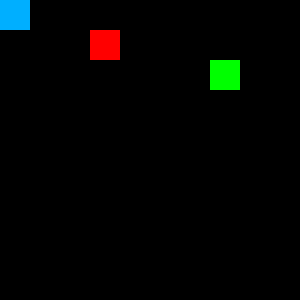

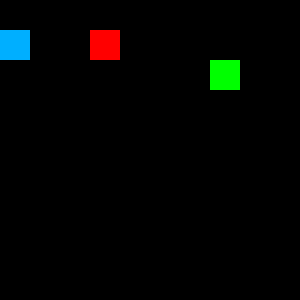

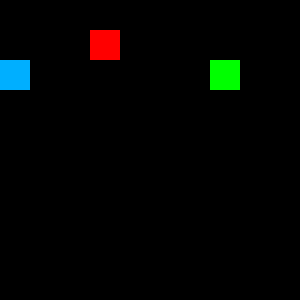

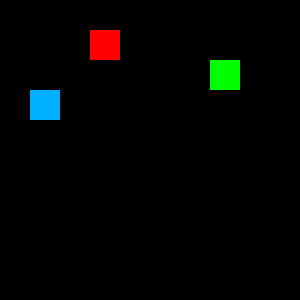

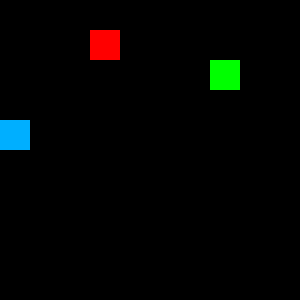

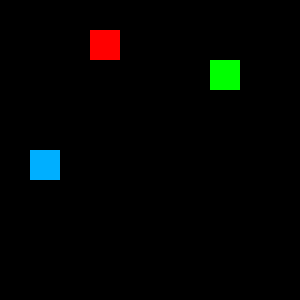

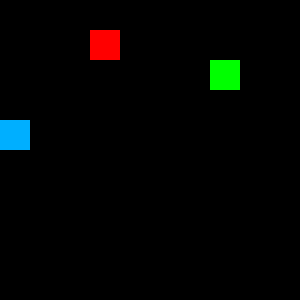

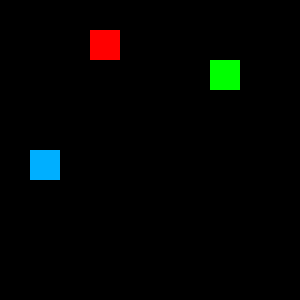

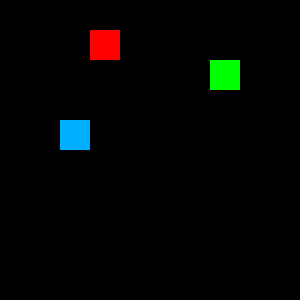

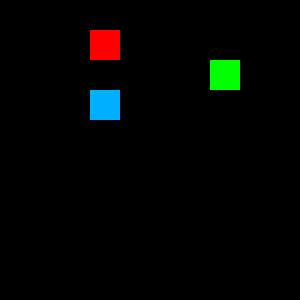

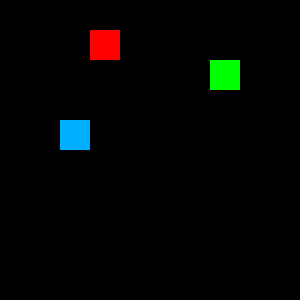

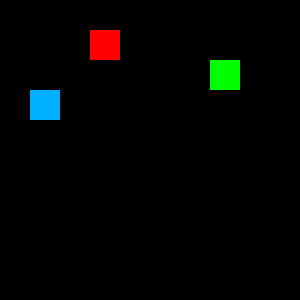

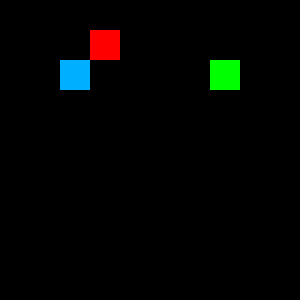

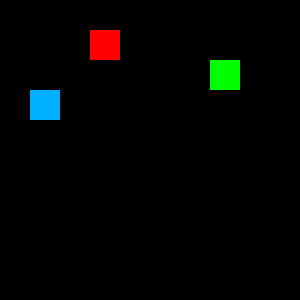

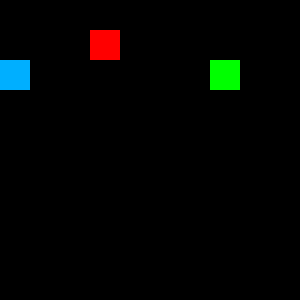

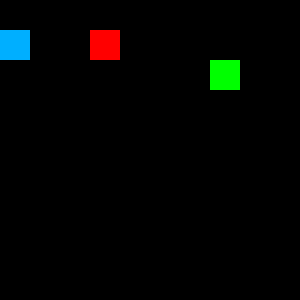

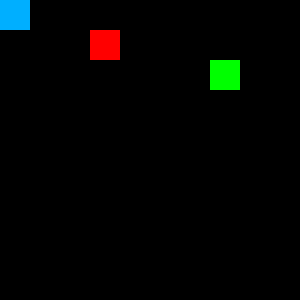

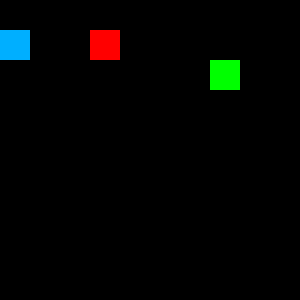

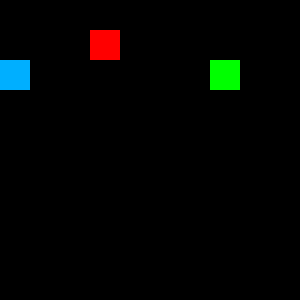

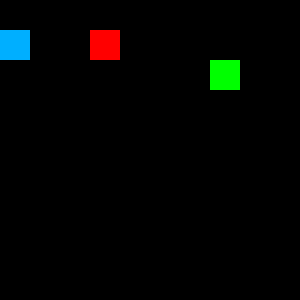

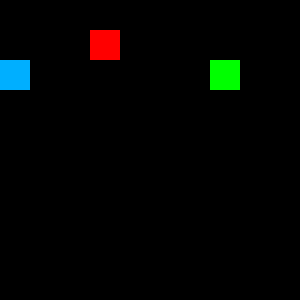

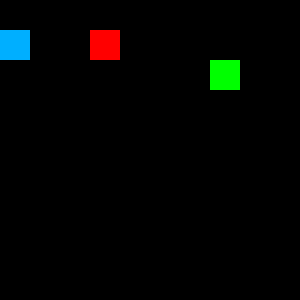

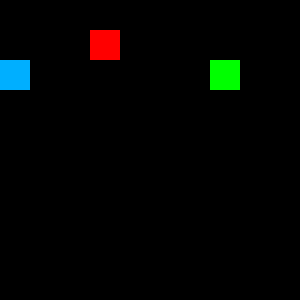

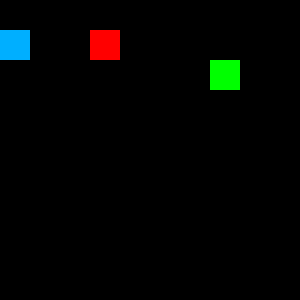

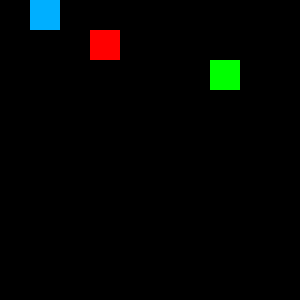

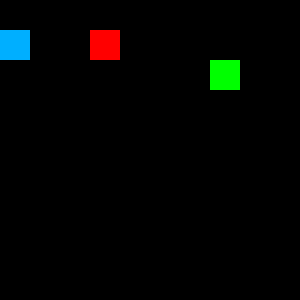

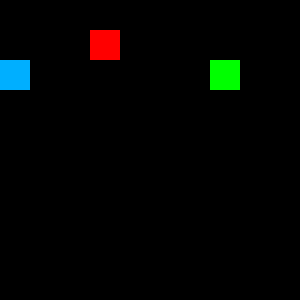

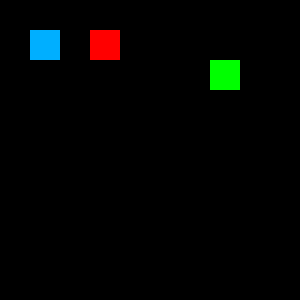

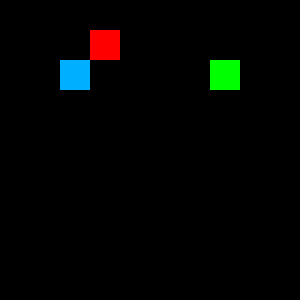

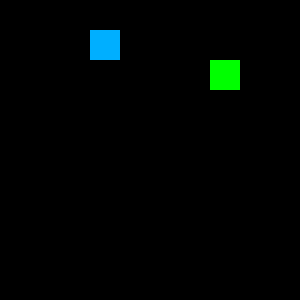

on # 6000, episolon: 0.27104225936046566
3000 ep mean -113.39833333333333


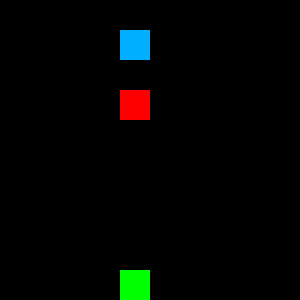

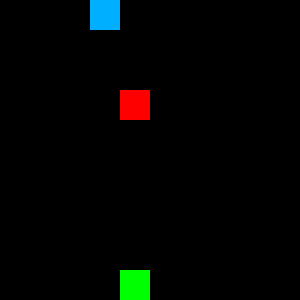

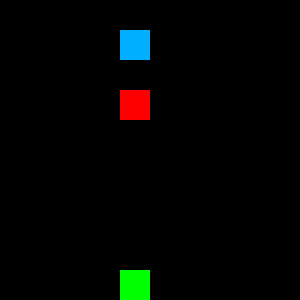

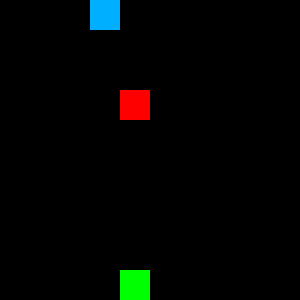

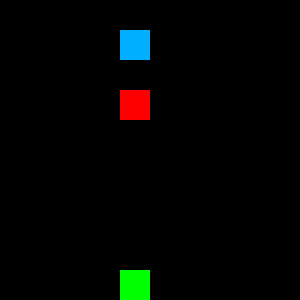

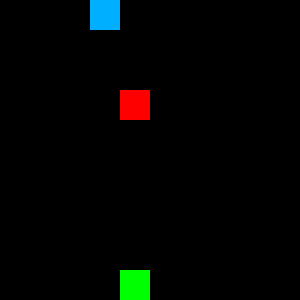

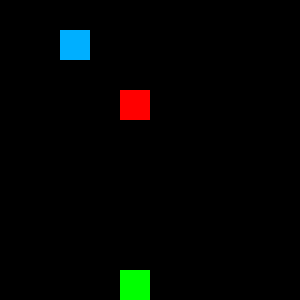

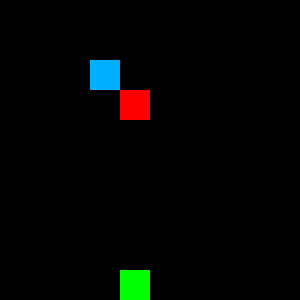

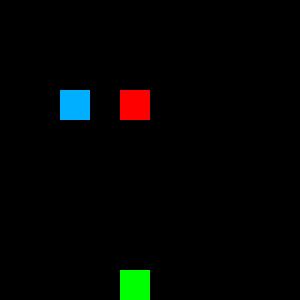

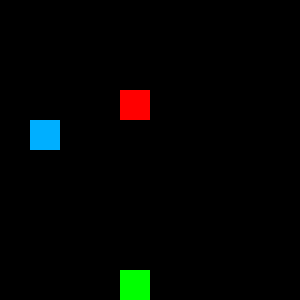

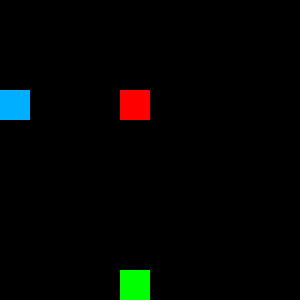

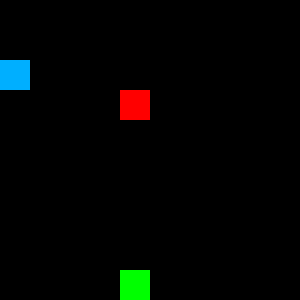

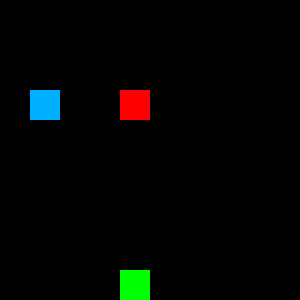

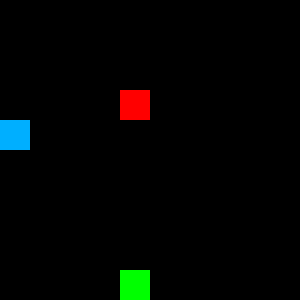

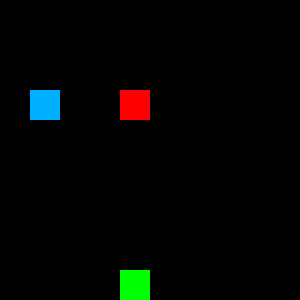

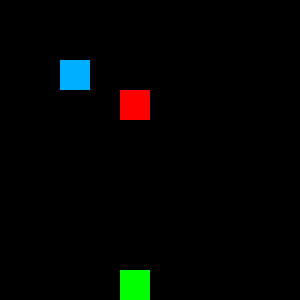

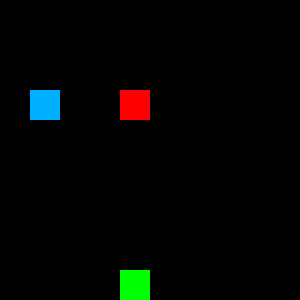

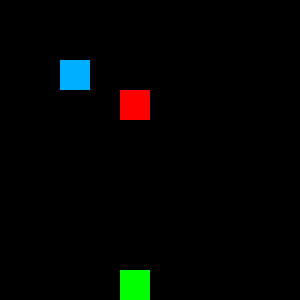

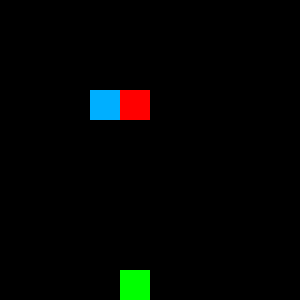

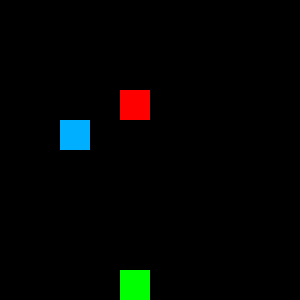

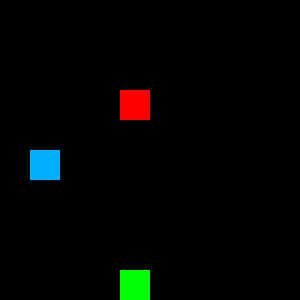

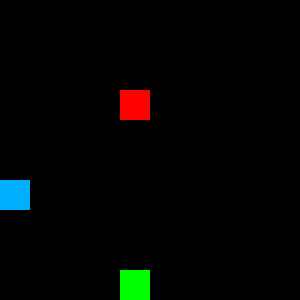

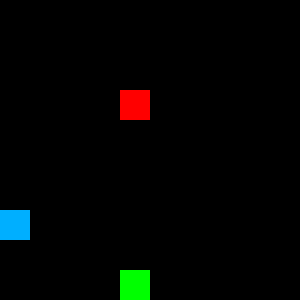

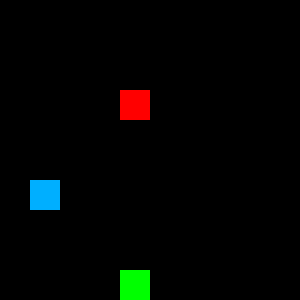

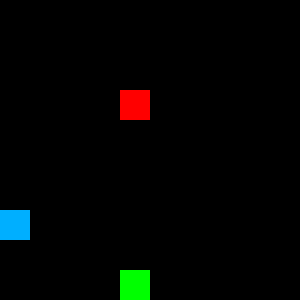

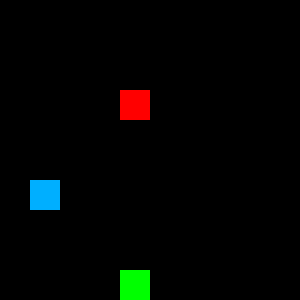

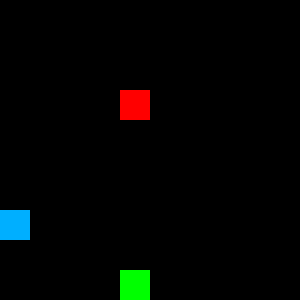

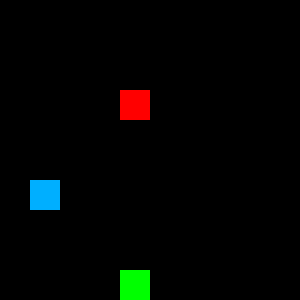

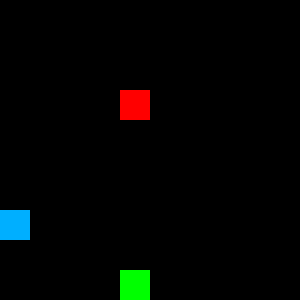

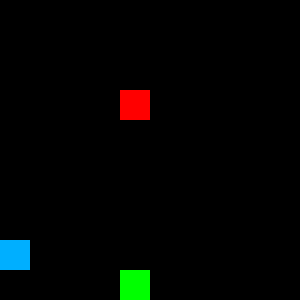

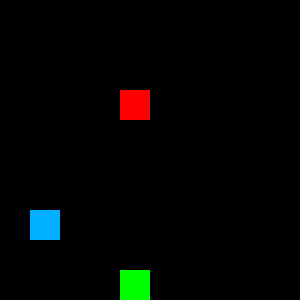

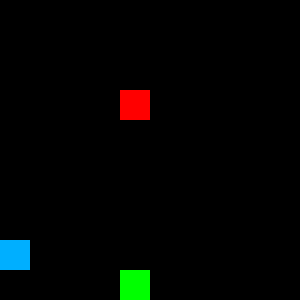

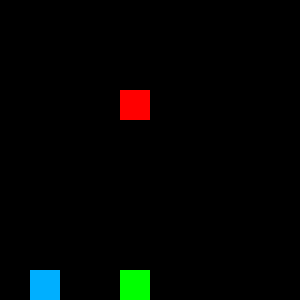

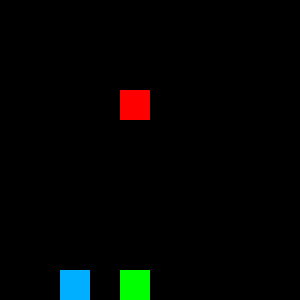

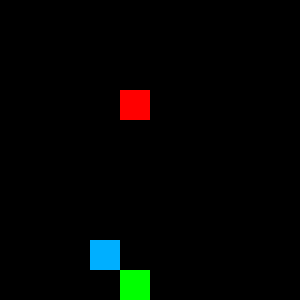

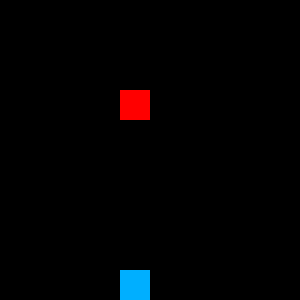

on # 9000, episolon: 0.14874221981913022
3000 ep mean -83.18266666666666


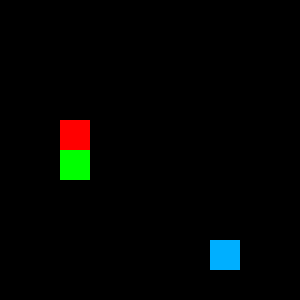

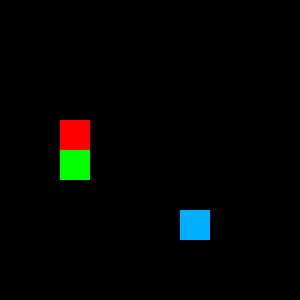

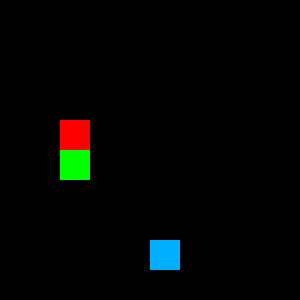

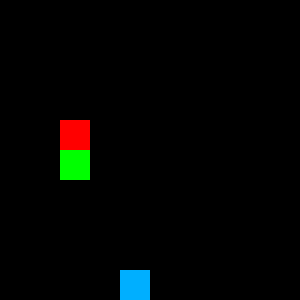

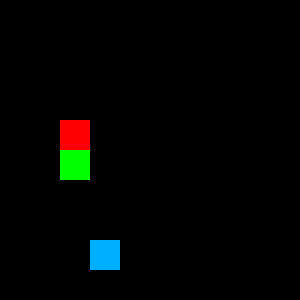

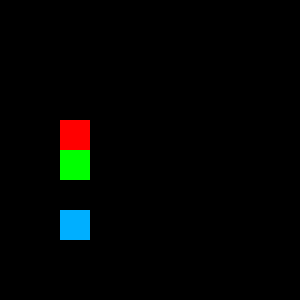

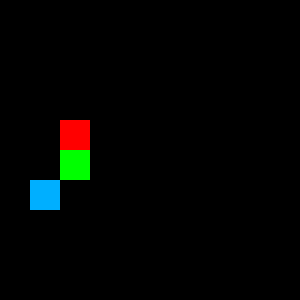

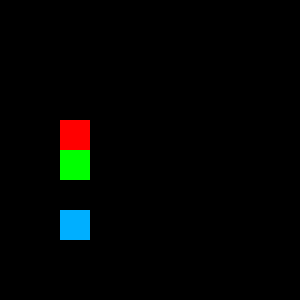

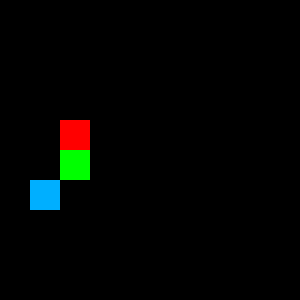

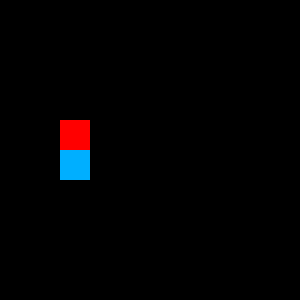

on # 12000, episolon: 0.08162656262136181
3000 ep mean -65.087


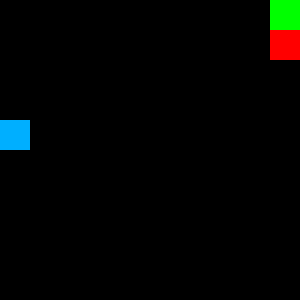

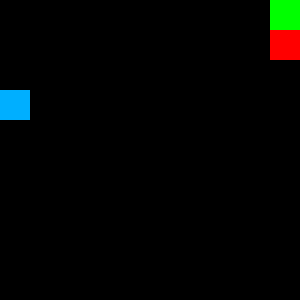

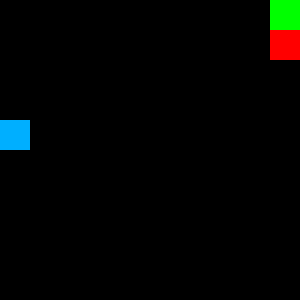

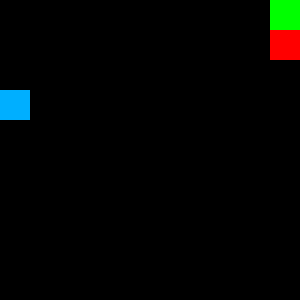

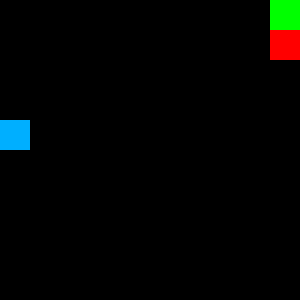

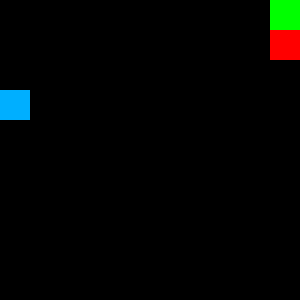

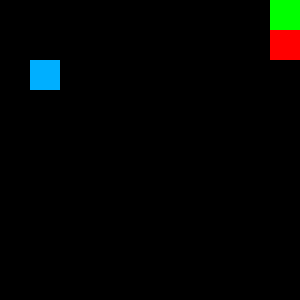

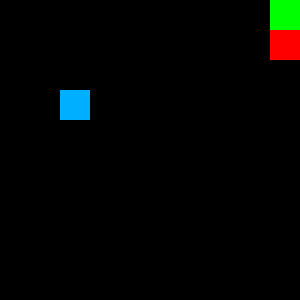

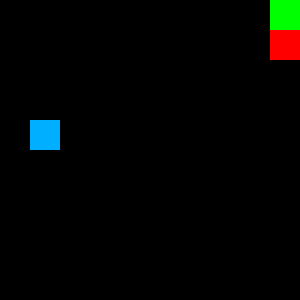

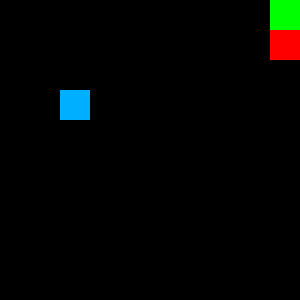

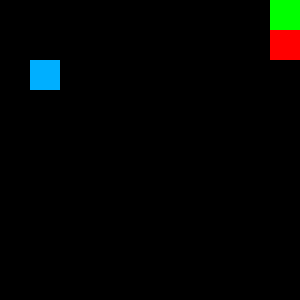

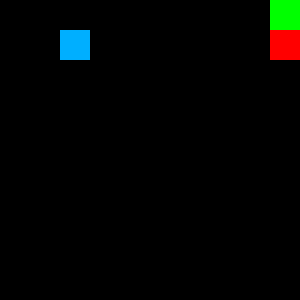

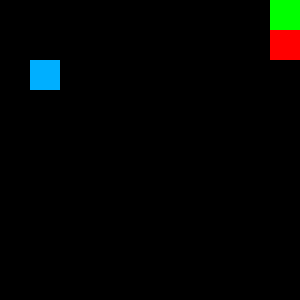

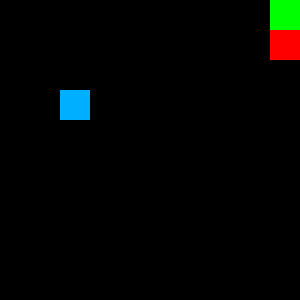

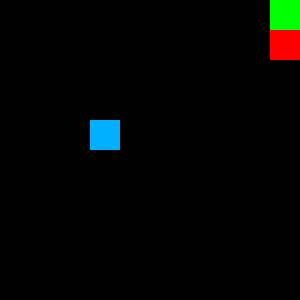

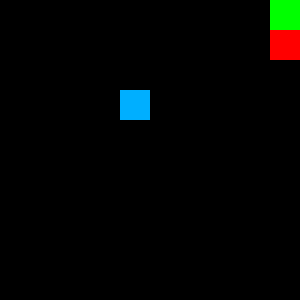

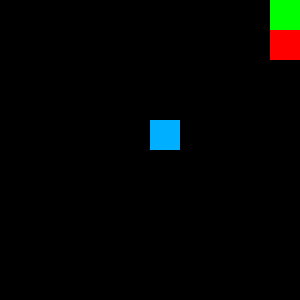

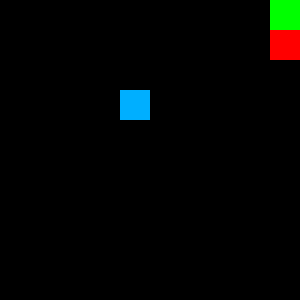

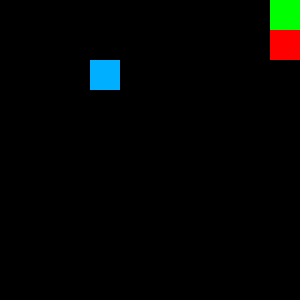

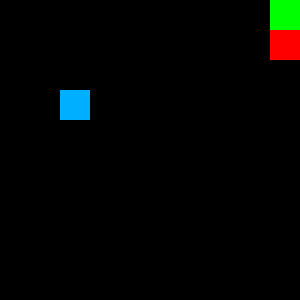

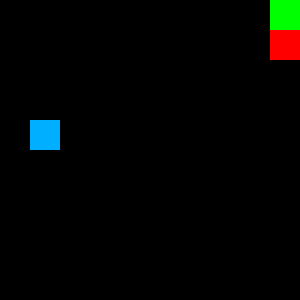

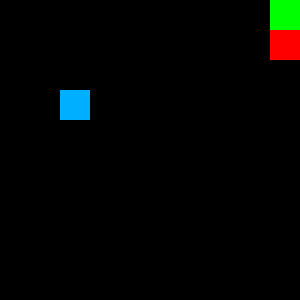

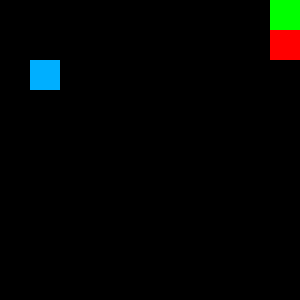

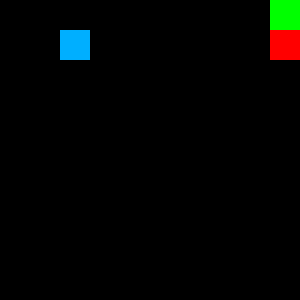

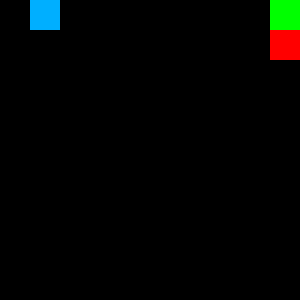

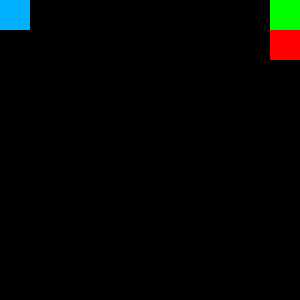

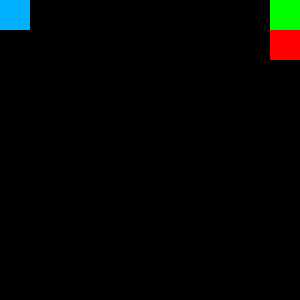

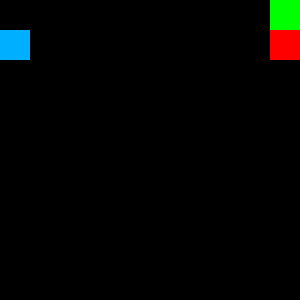

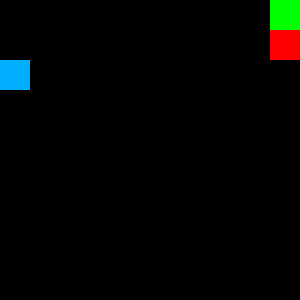

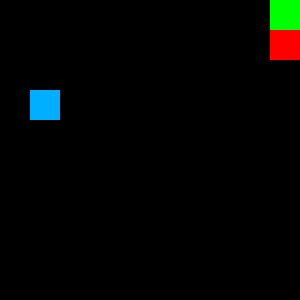

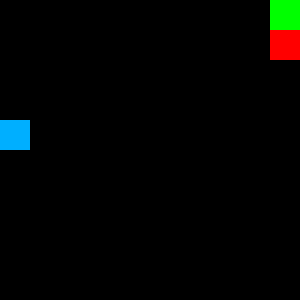

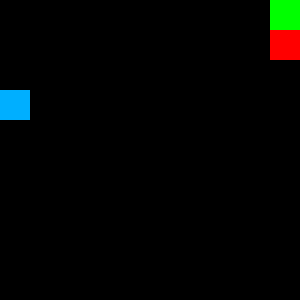

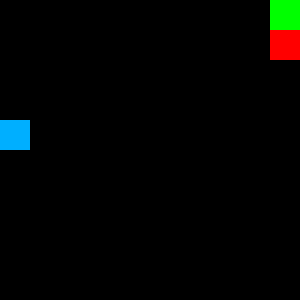

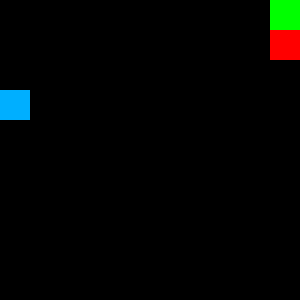

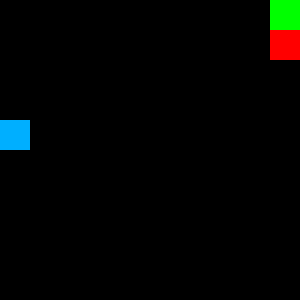

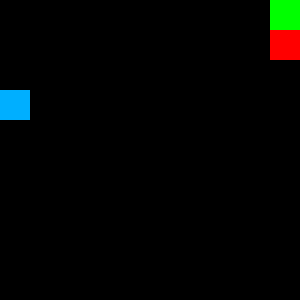

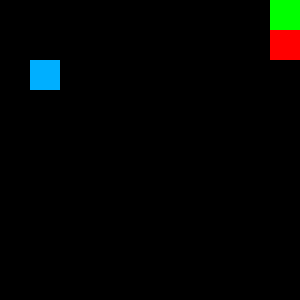

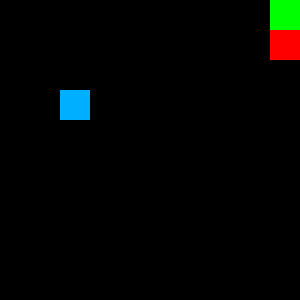

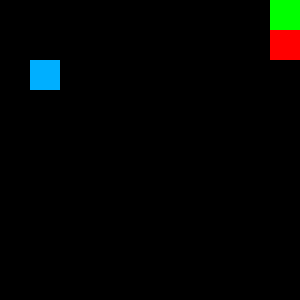

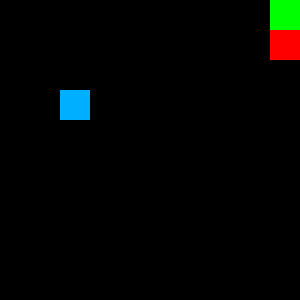

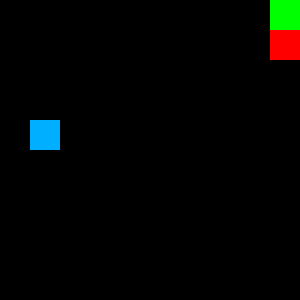

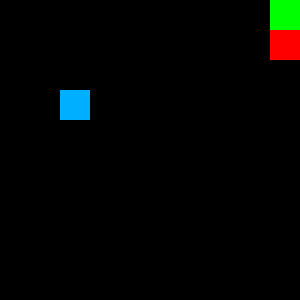

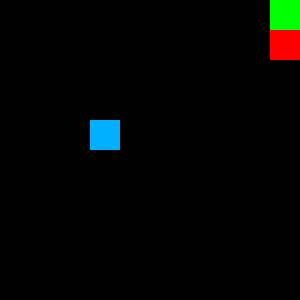

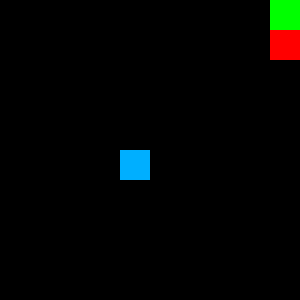

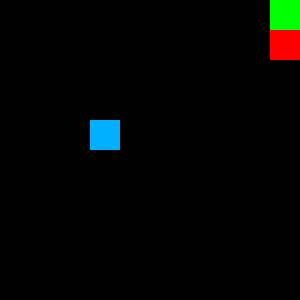

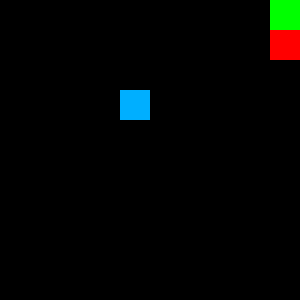

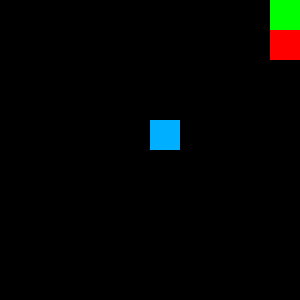

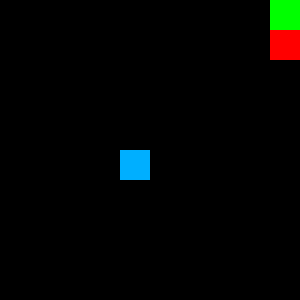

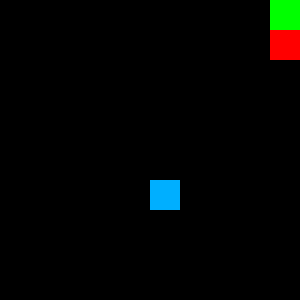

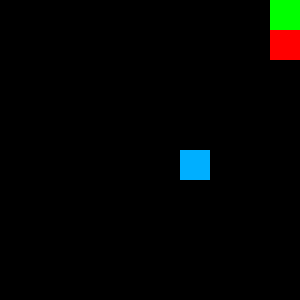

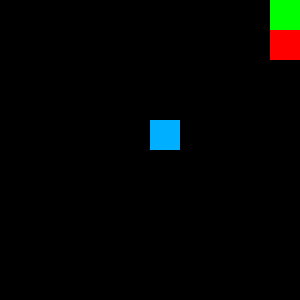

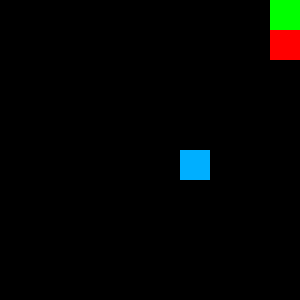

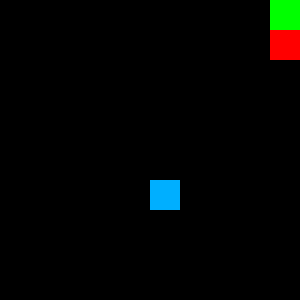

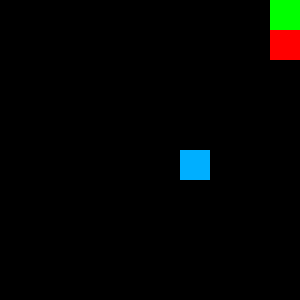

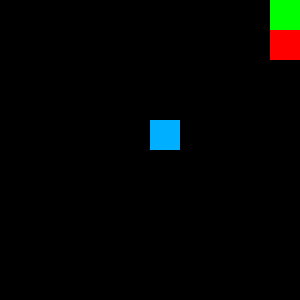

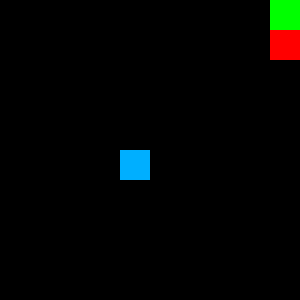

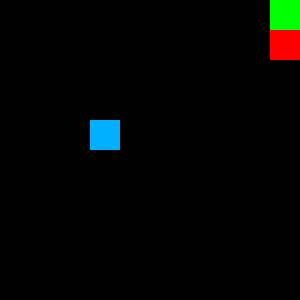

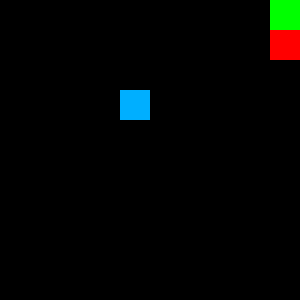

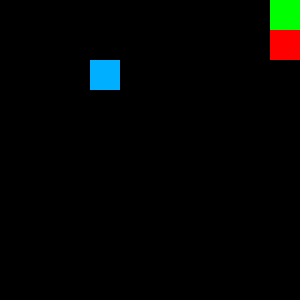

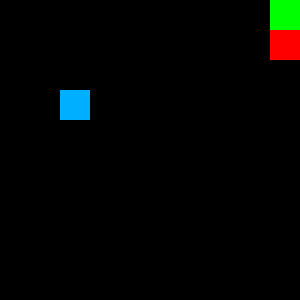

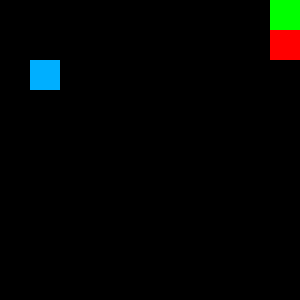

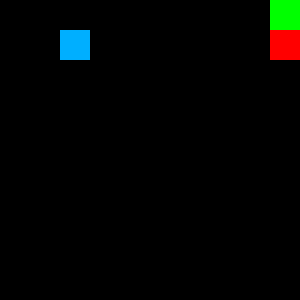

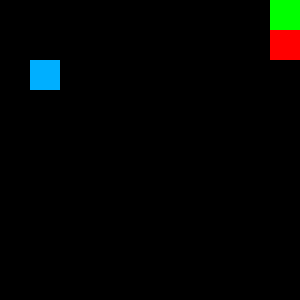

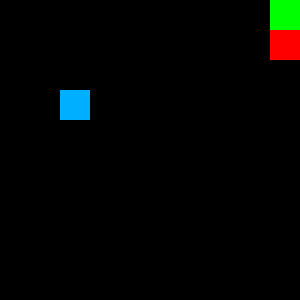

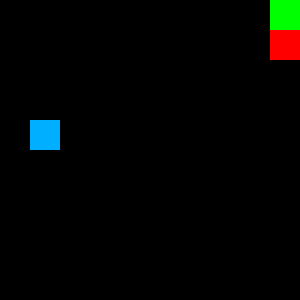

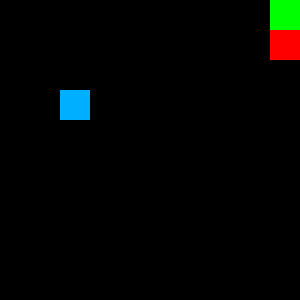

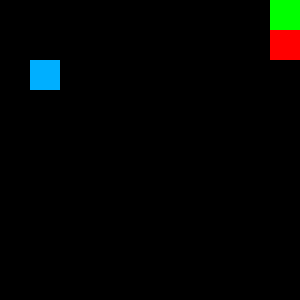

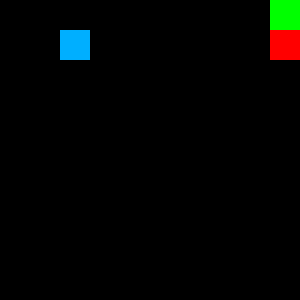

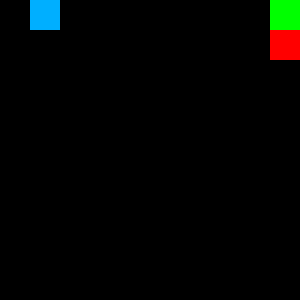

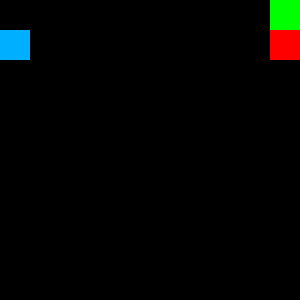

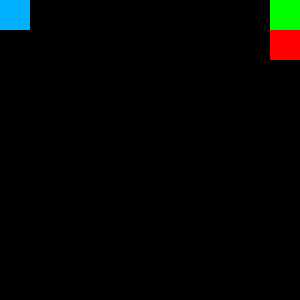

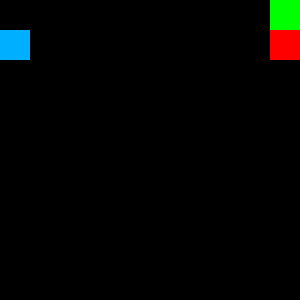

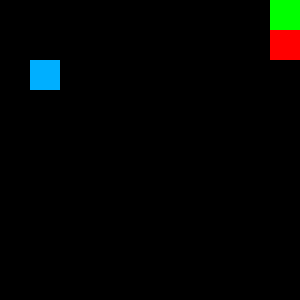

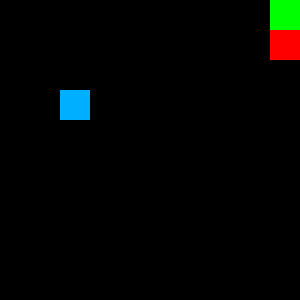

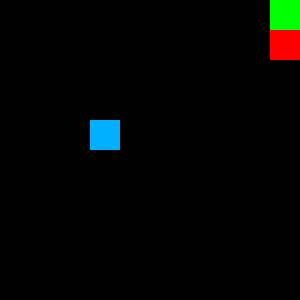

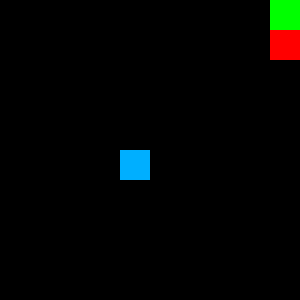

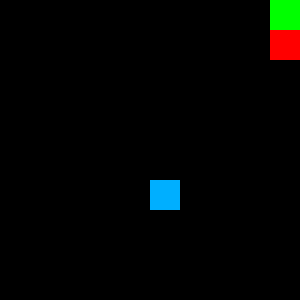

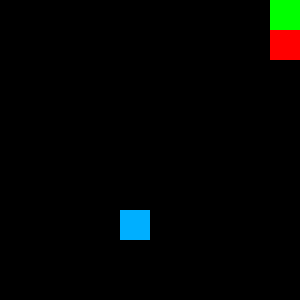

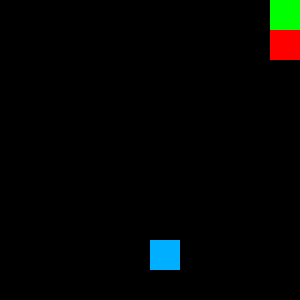

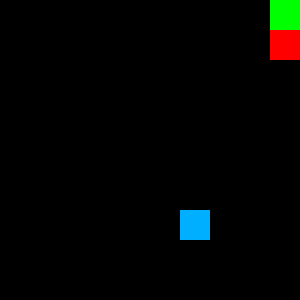

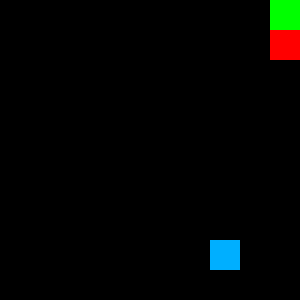

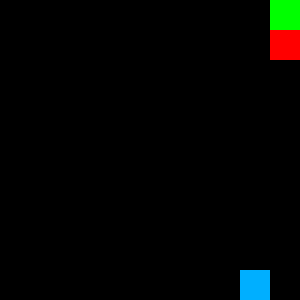

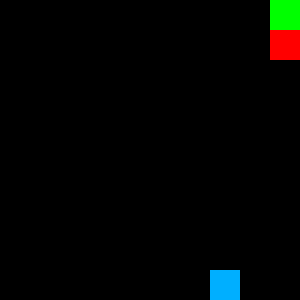

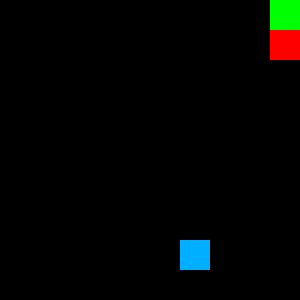

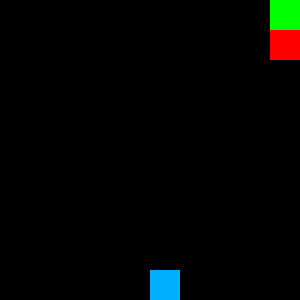

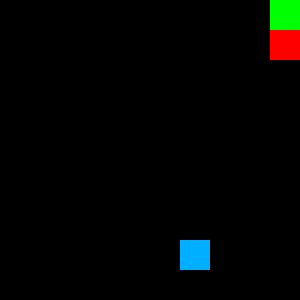

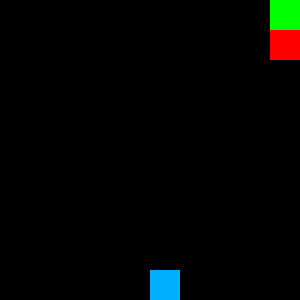

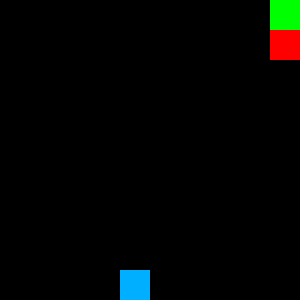

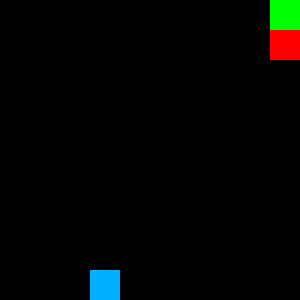

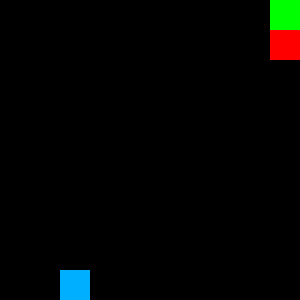

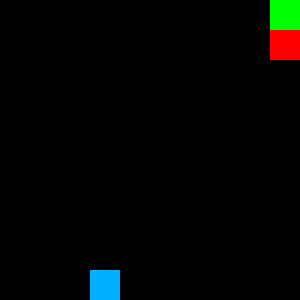

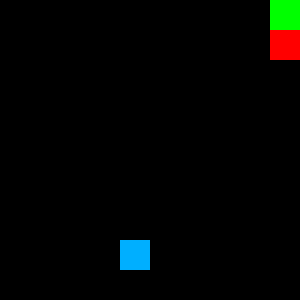

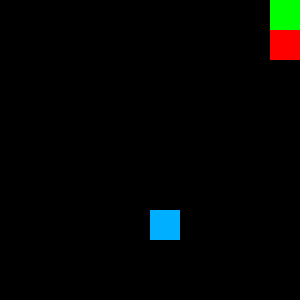

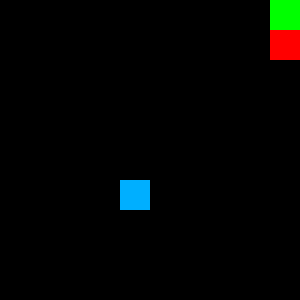

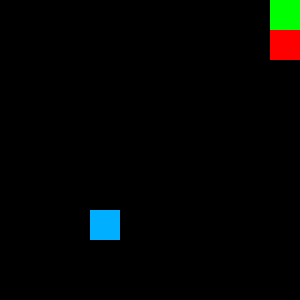

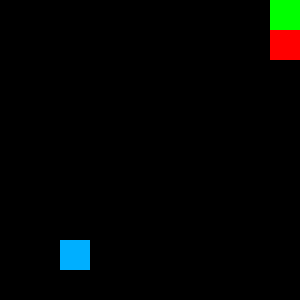

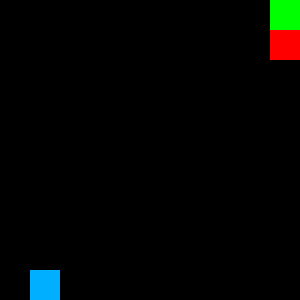

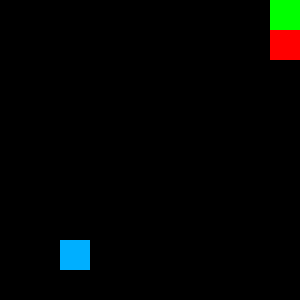

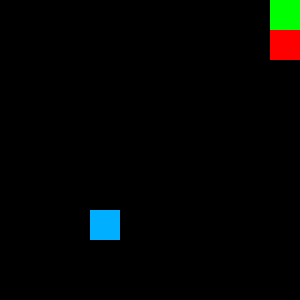

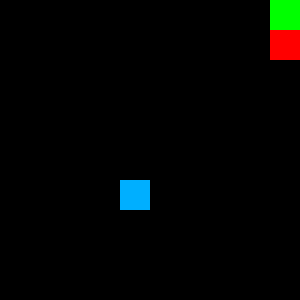

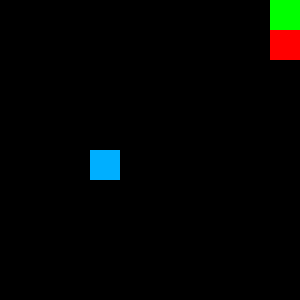

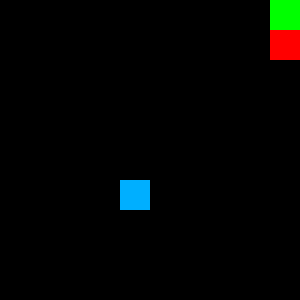

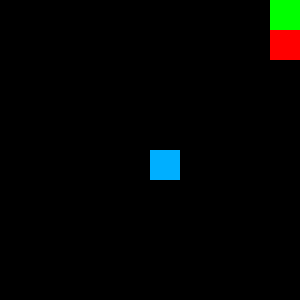

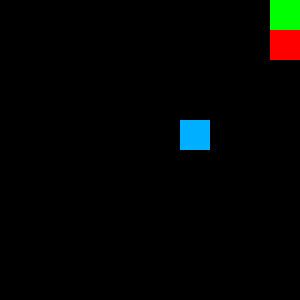

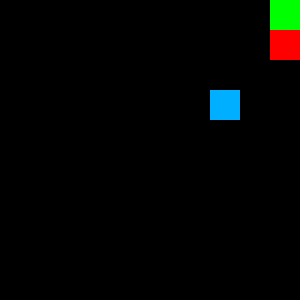

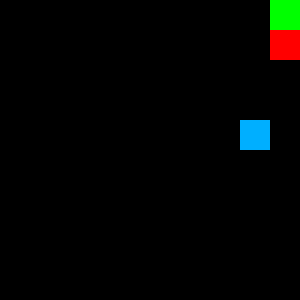

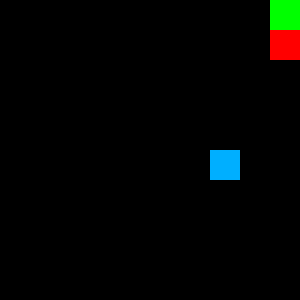

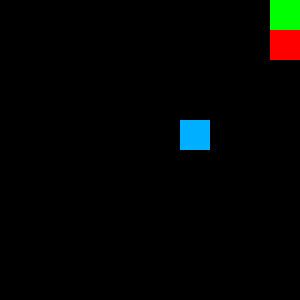

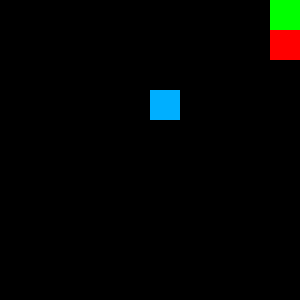

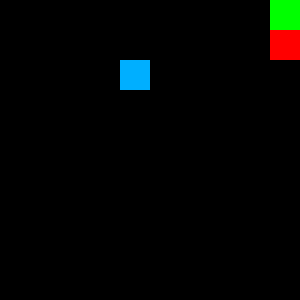

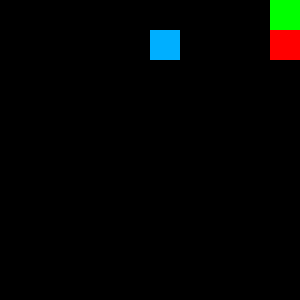

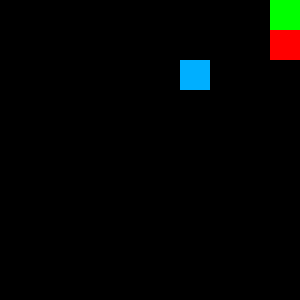

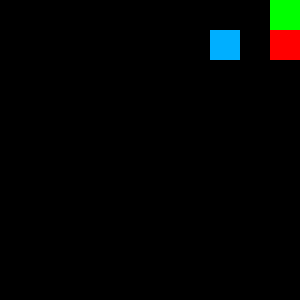

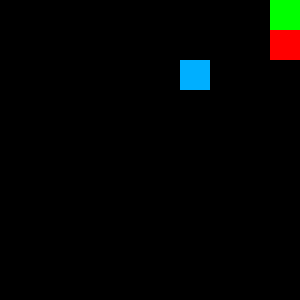

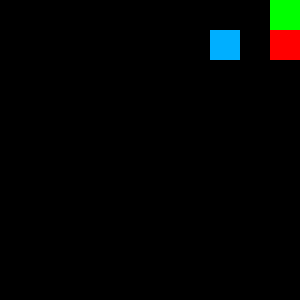

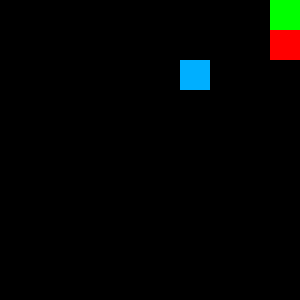

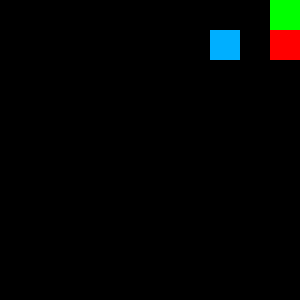

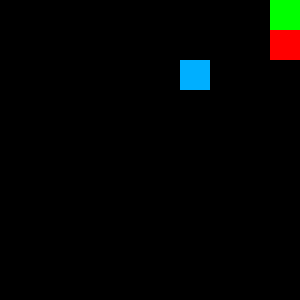

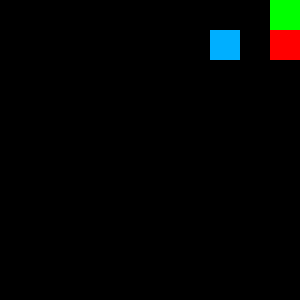

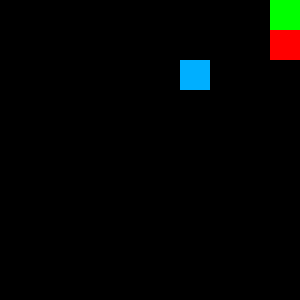

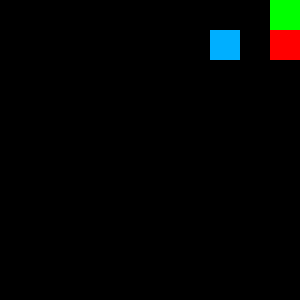

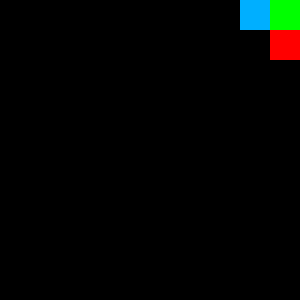

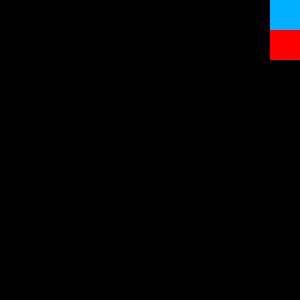

on # 15000, episolon: 0.044794919246742226
3000 ep mean -55.68233333333333


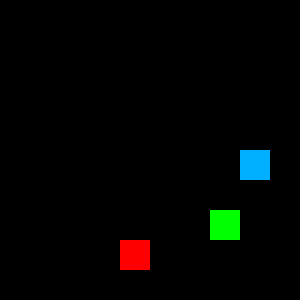

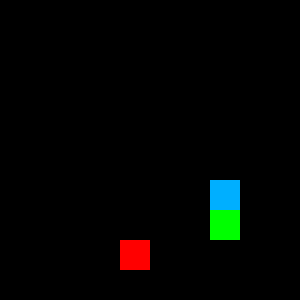

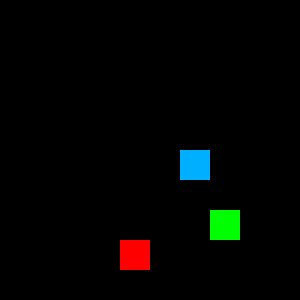

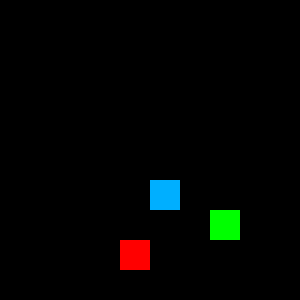

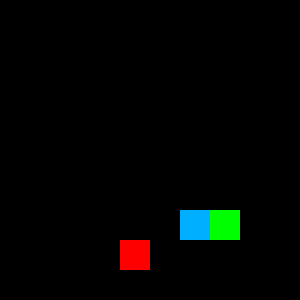

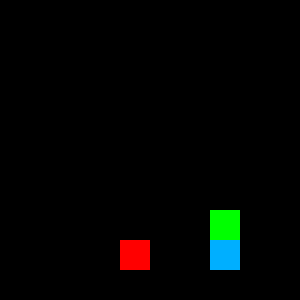

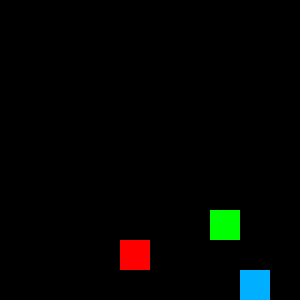

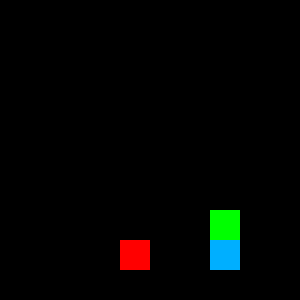

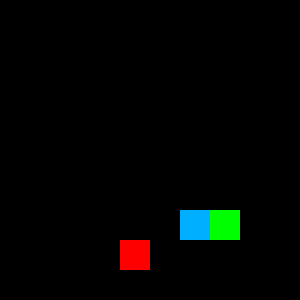

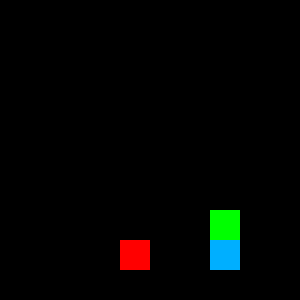

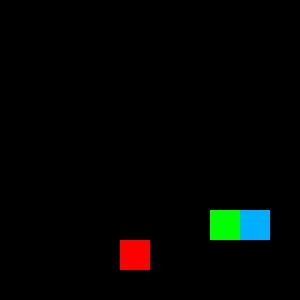

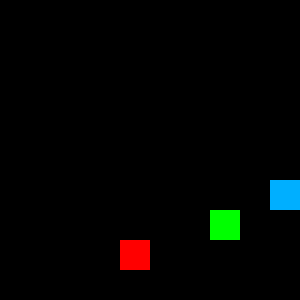

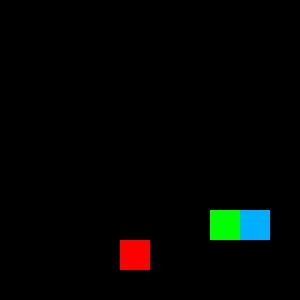

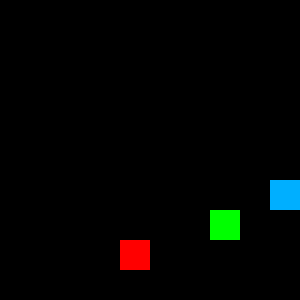

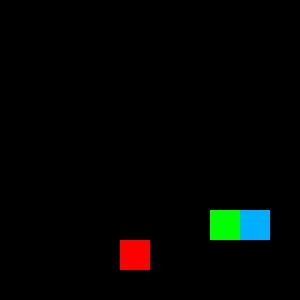

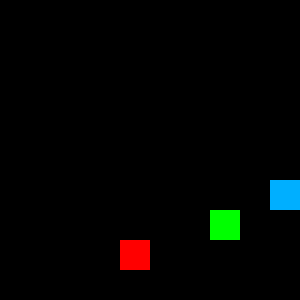

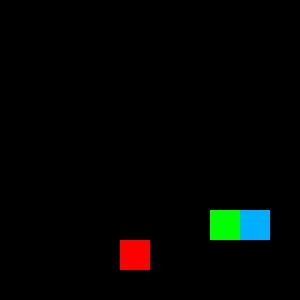

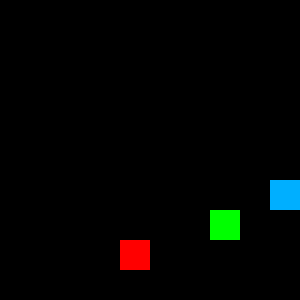

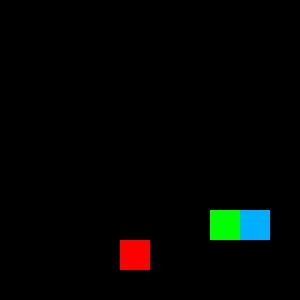

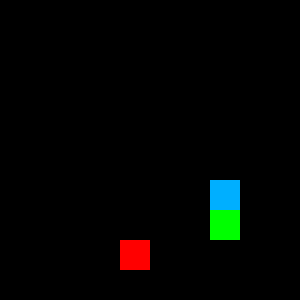

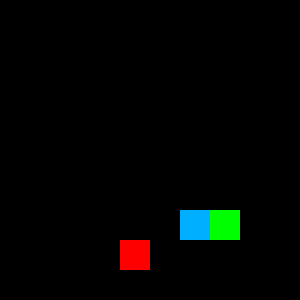

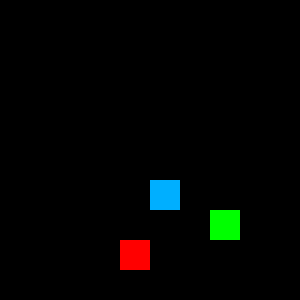

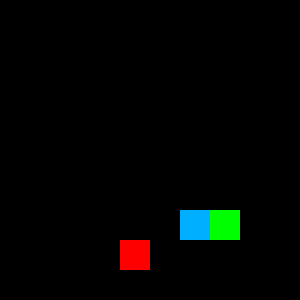

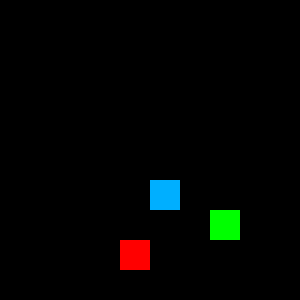

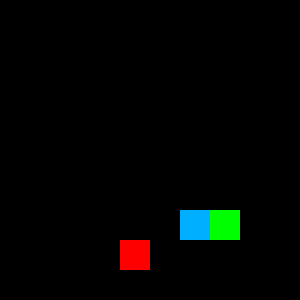

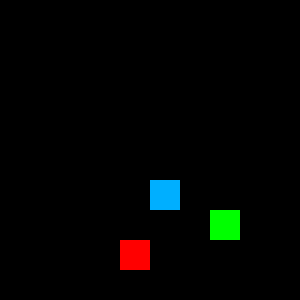

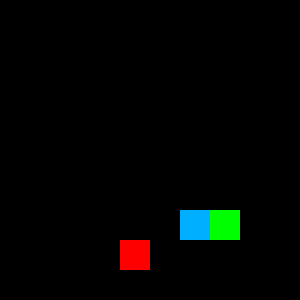

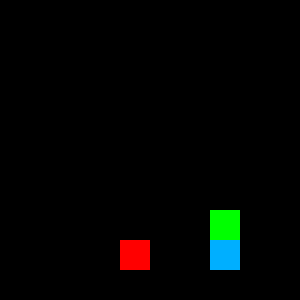

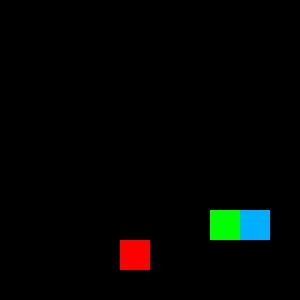

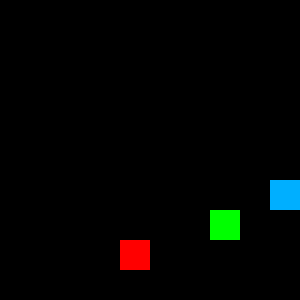

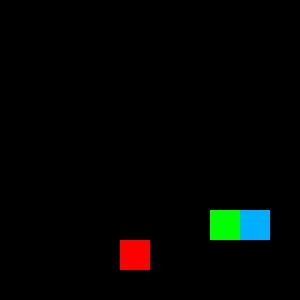

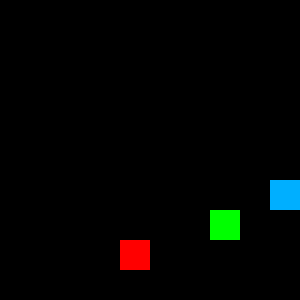

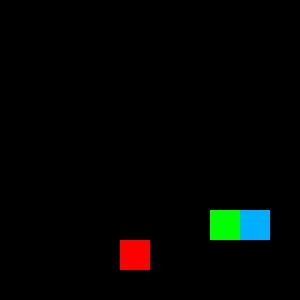

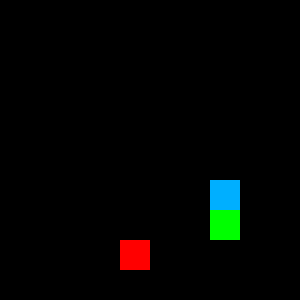

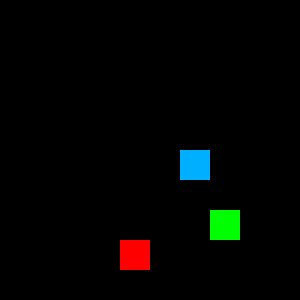

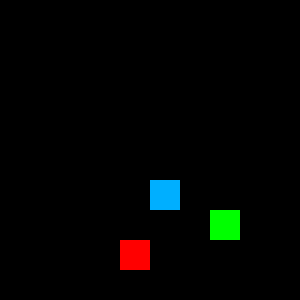

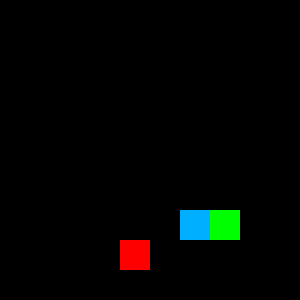

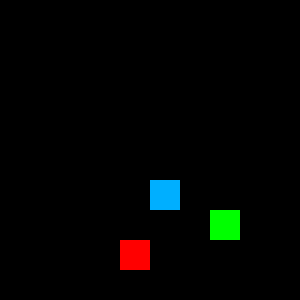

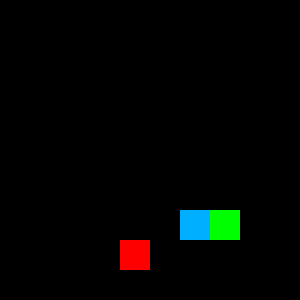

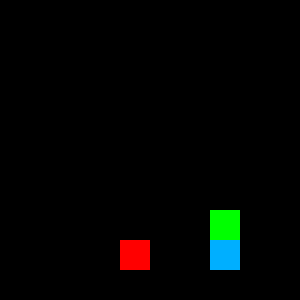

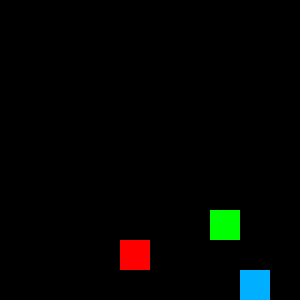

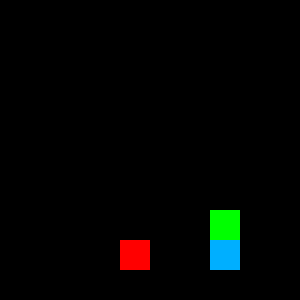

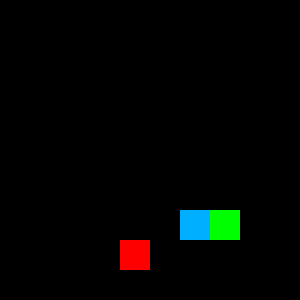

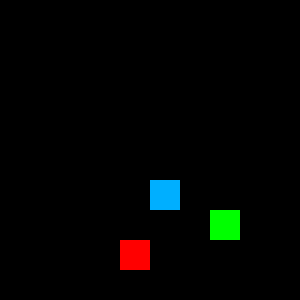

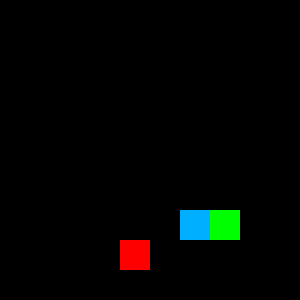

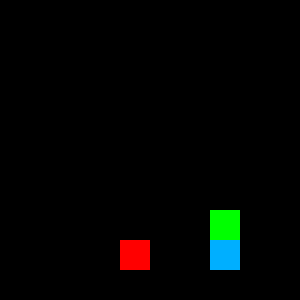

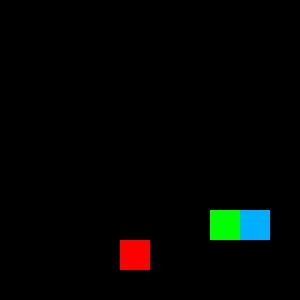

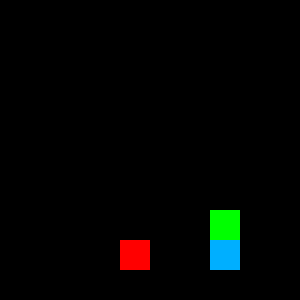

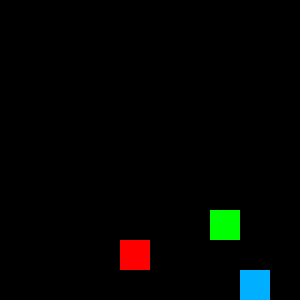

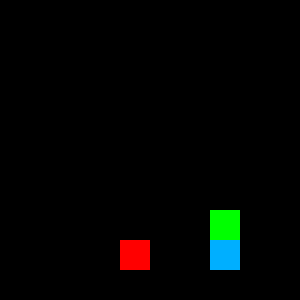

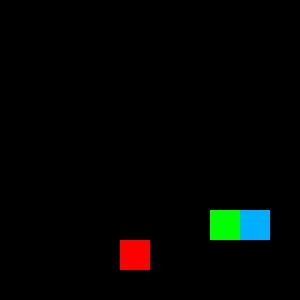

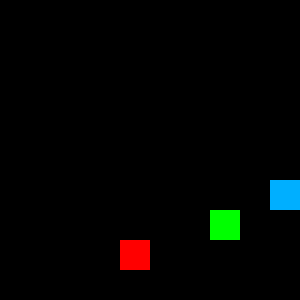

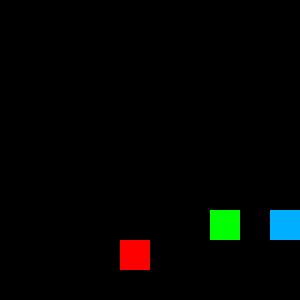

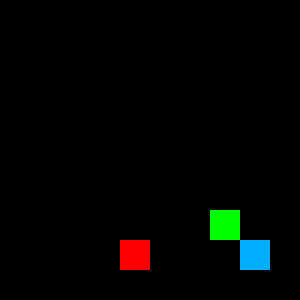

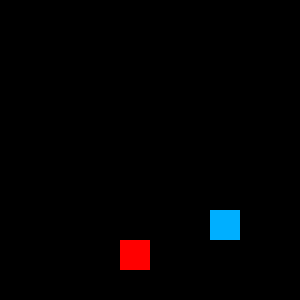

on # 18000, episolon: 0.024582497729691496
3000 ep mean -46.244


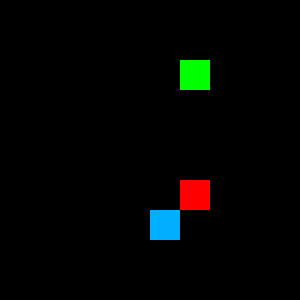

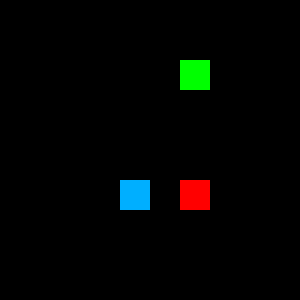

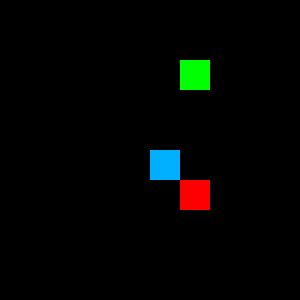

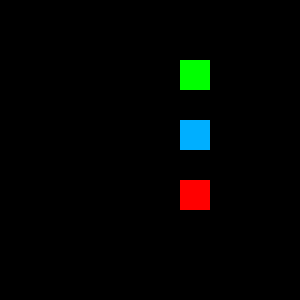

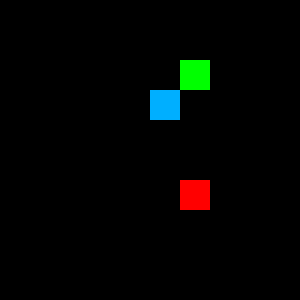

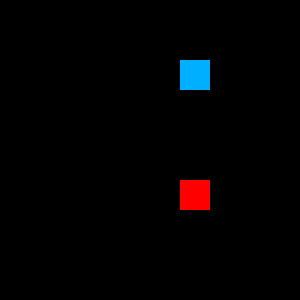

on # 21000, episolon: 0.01349035124500733
3000 ep mean -37.824


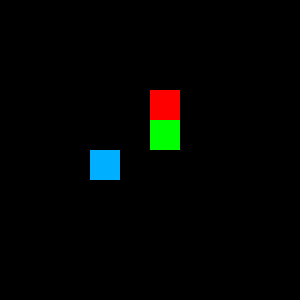

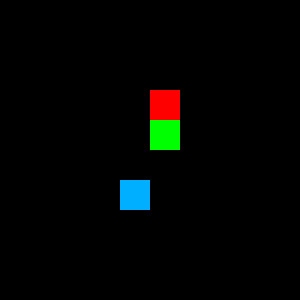

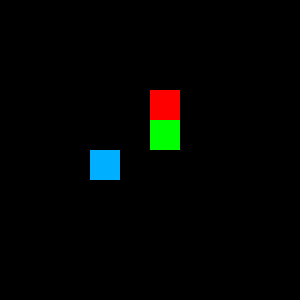

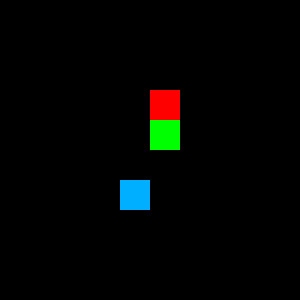

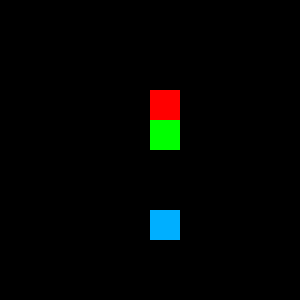

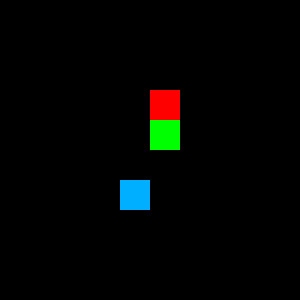

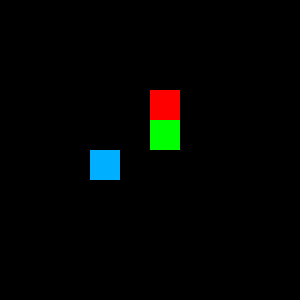

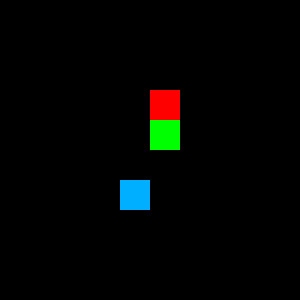

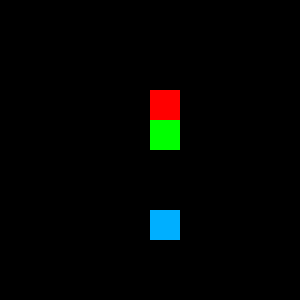

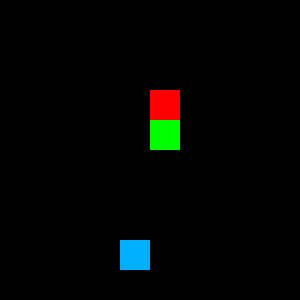

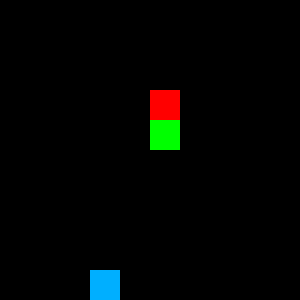

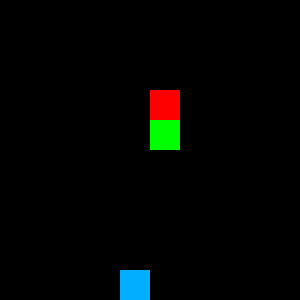

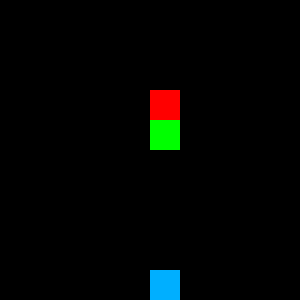

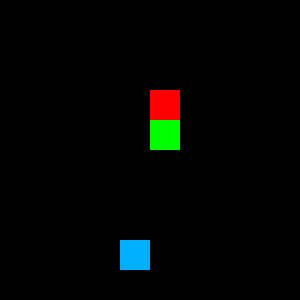

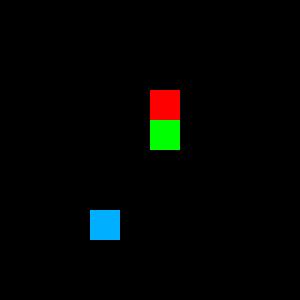

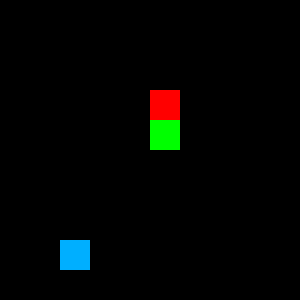

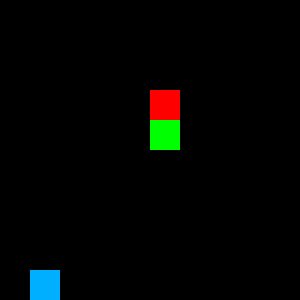

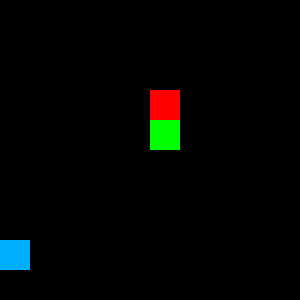

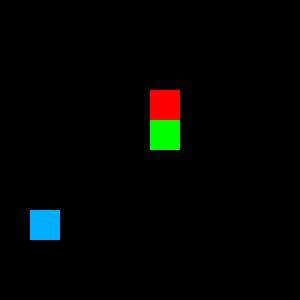

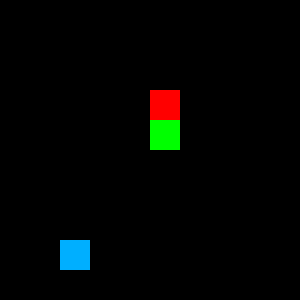

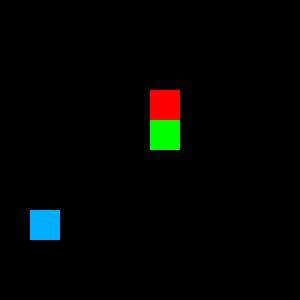

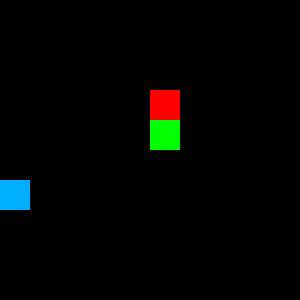

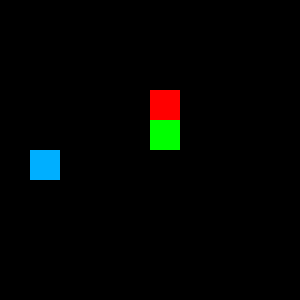

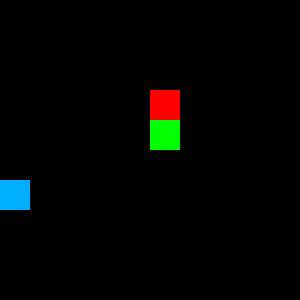

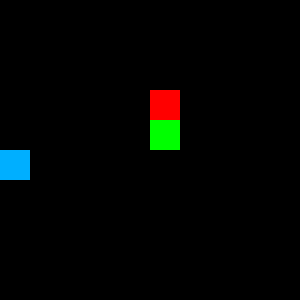

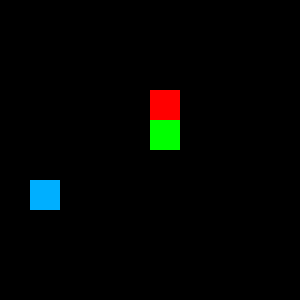

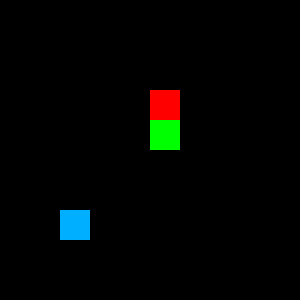

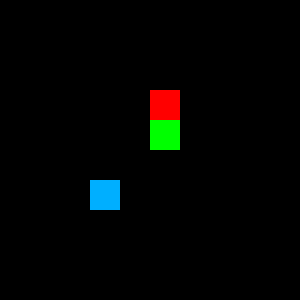

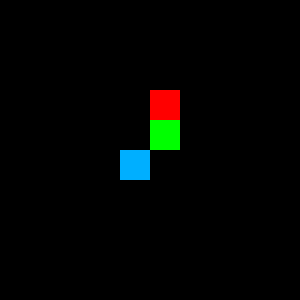

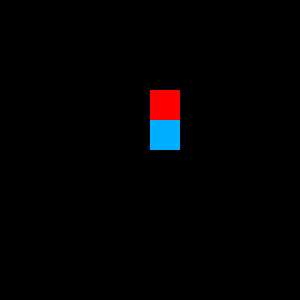

on # 24000, episolon: 0.0074032174726434705
3000 ep mean -34.23266666666667


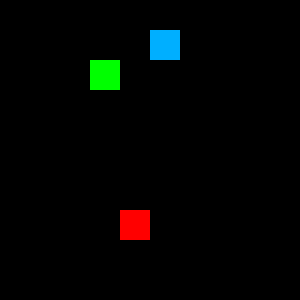

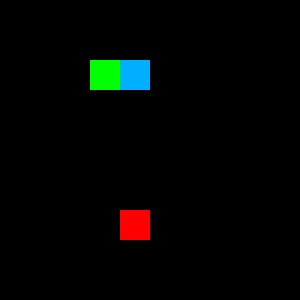

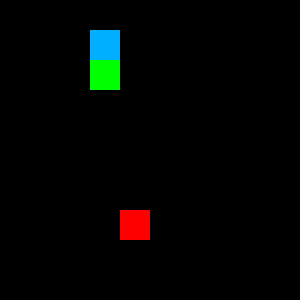

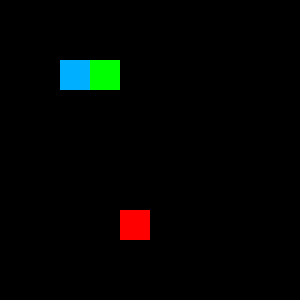

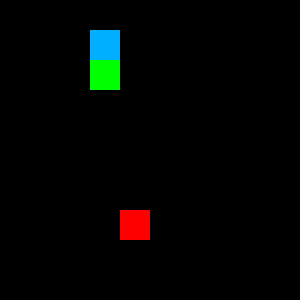

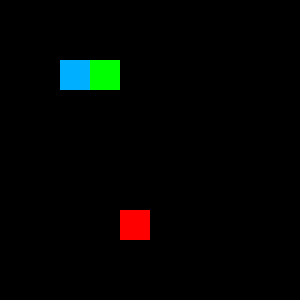

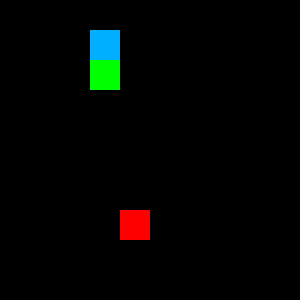

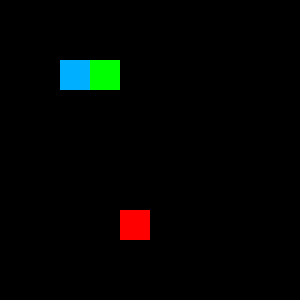

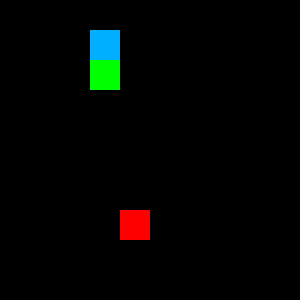

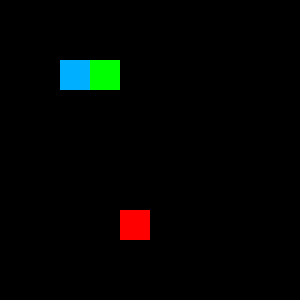

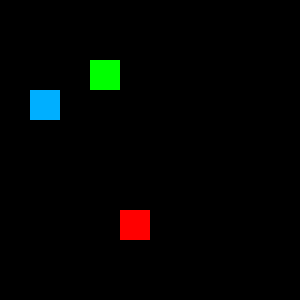

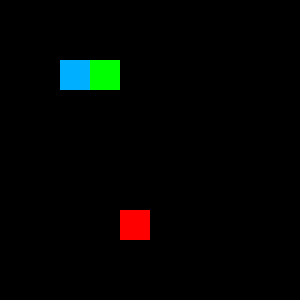

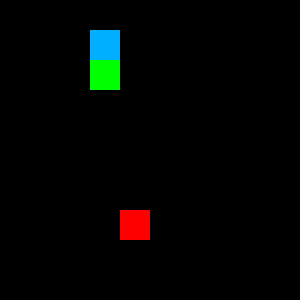

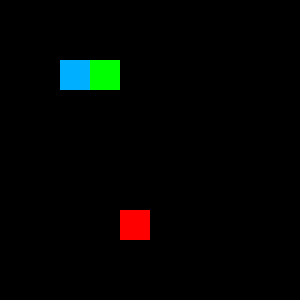

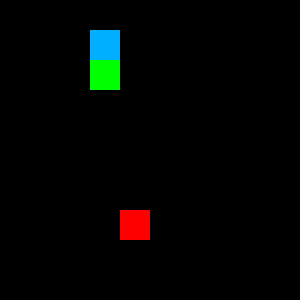

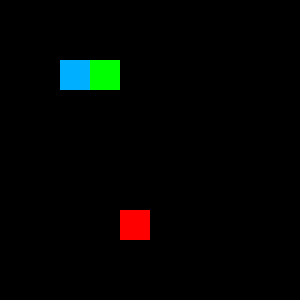

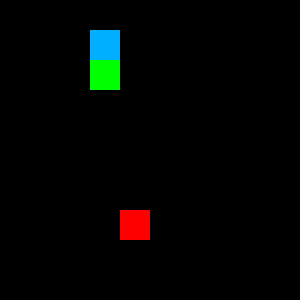

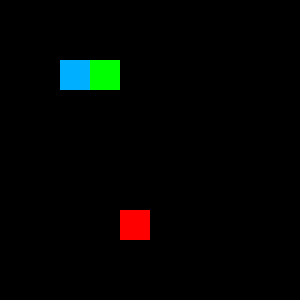

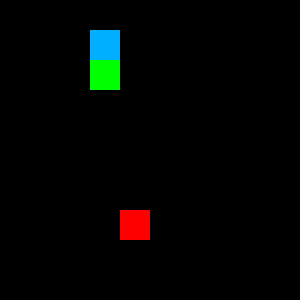

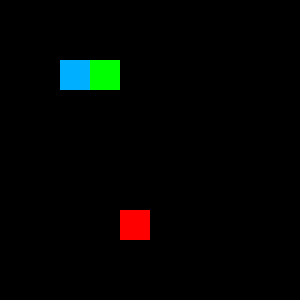

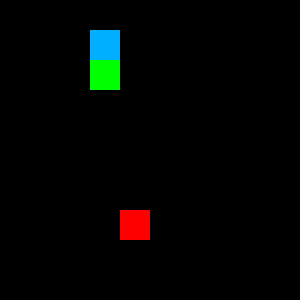

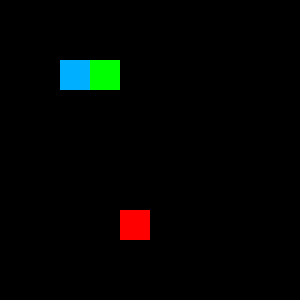

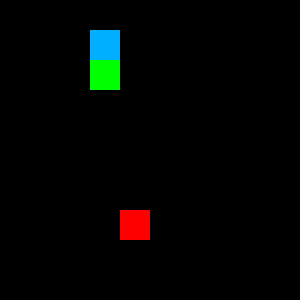

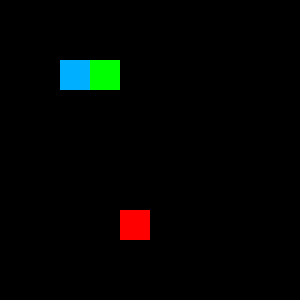

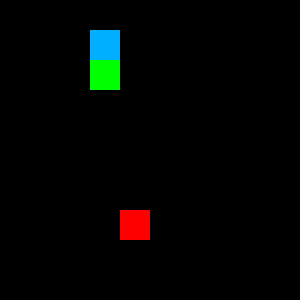

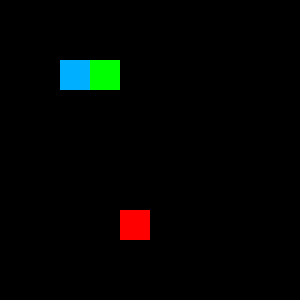

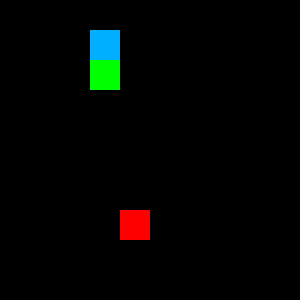

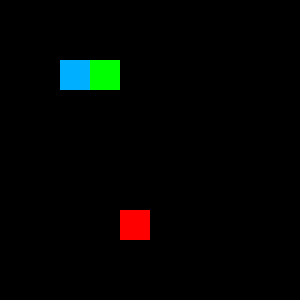

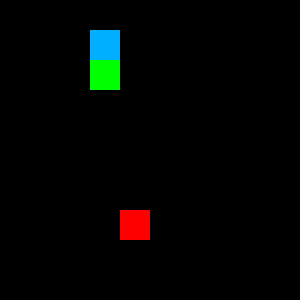

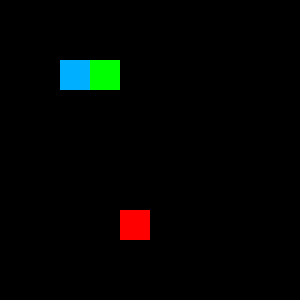

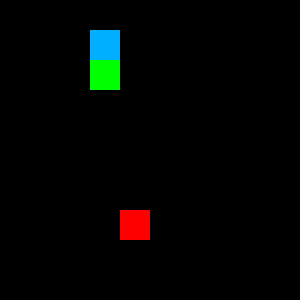

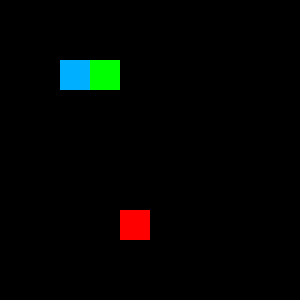

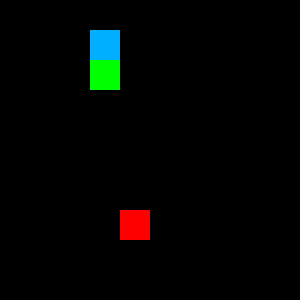

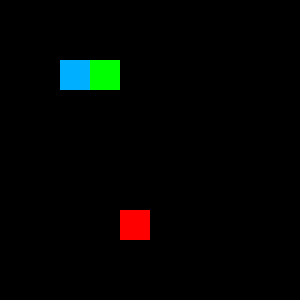

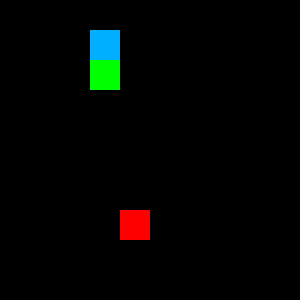

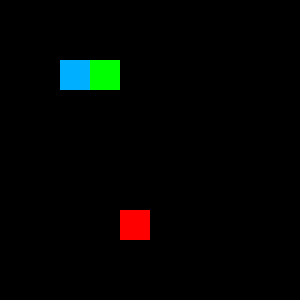

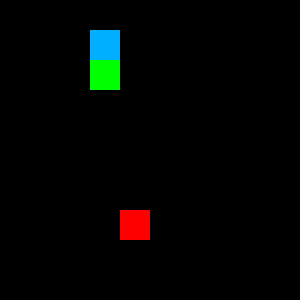

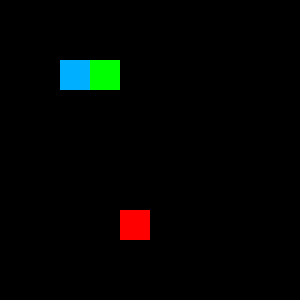

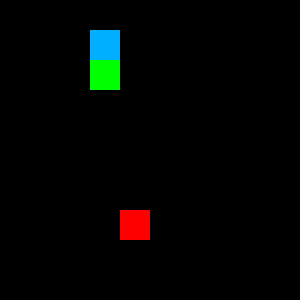

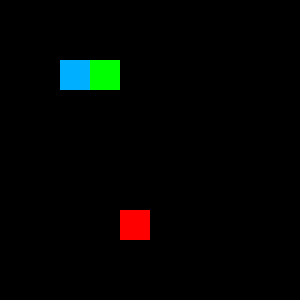

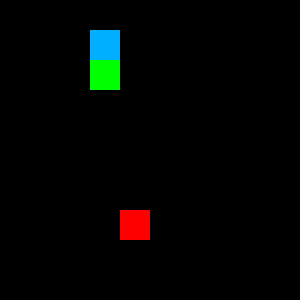

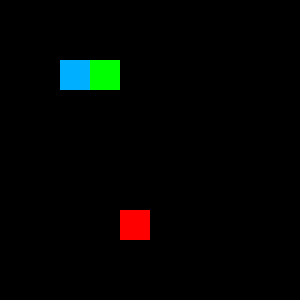

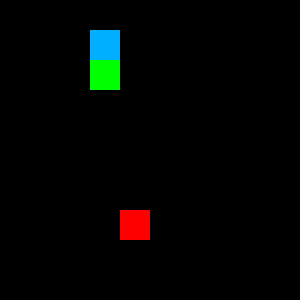

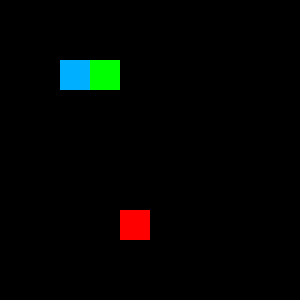

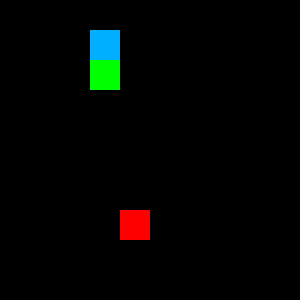

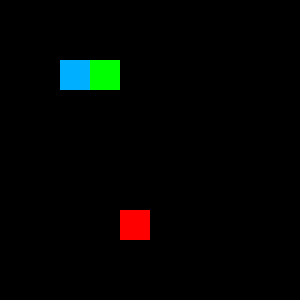

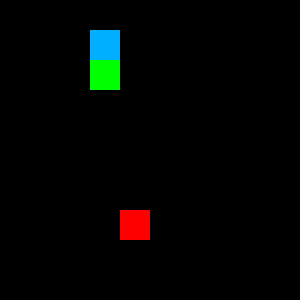

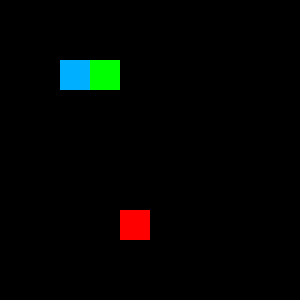

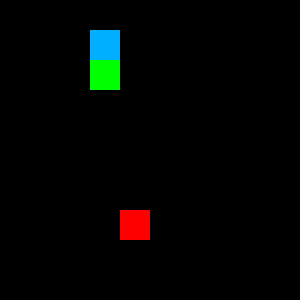

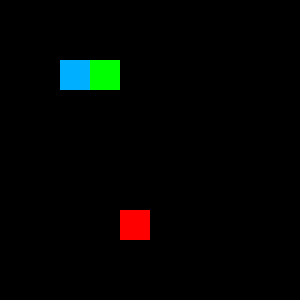

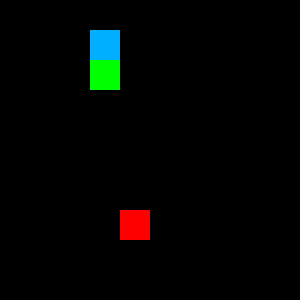

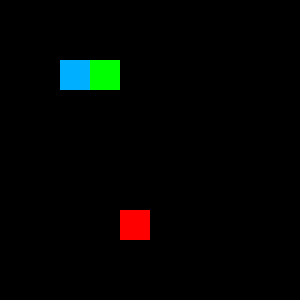

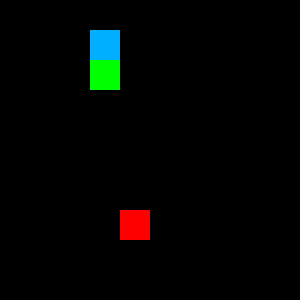

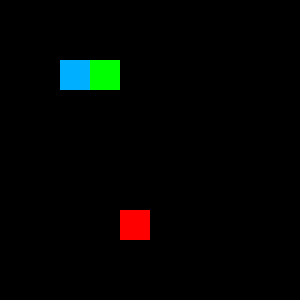

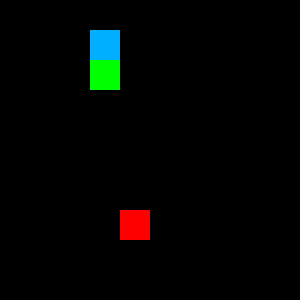

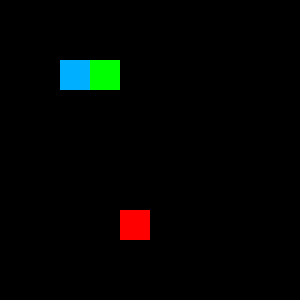

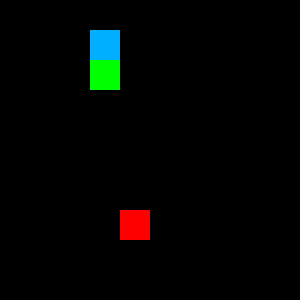

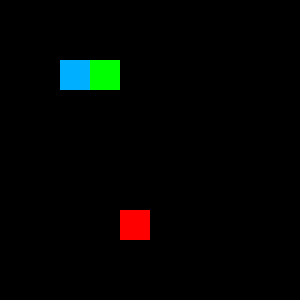

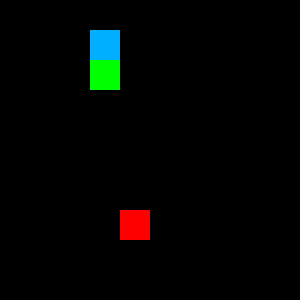

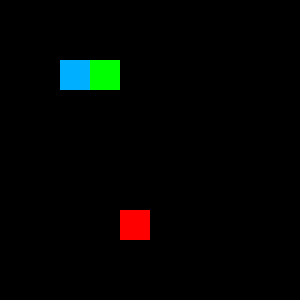

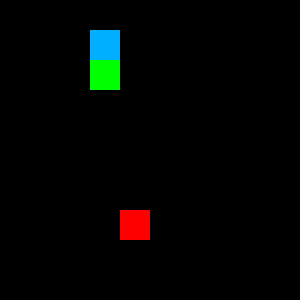

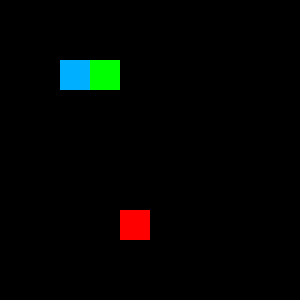

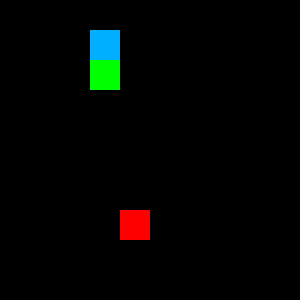

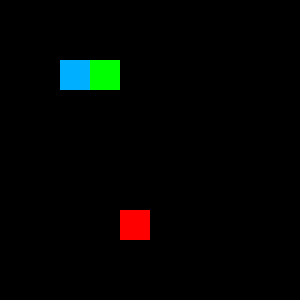

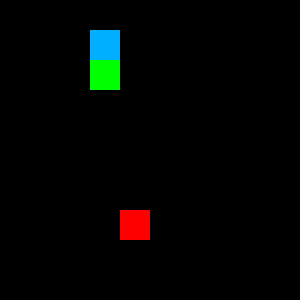

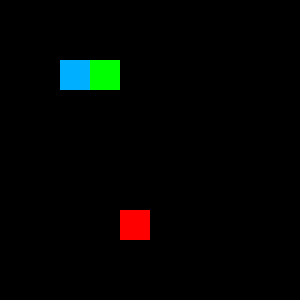

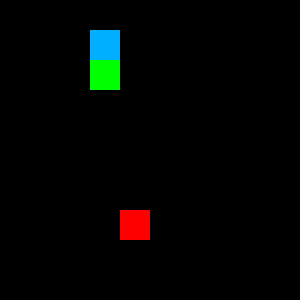

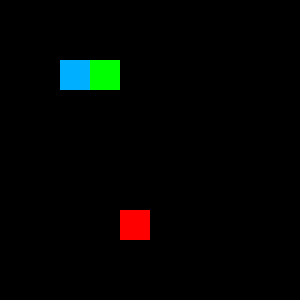

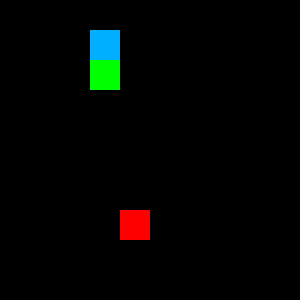

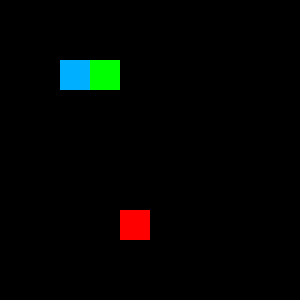

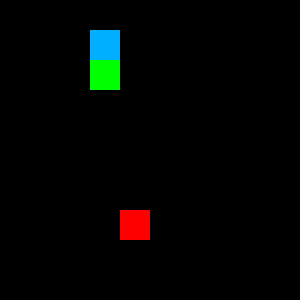

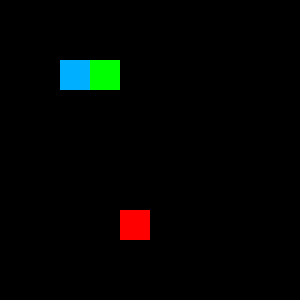

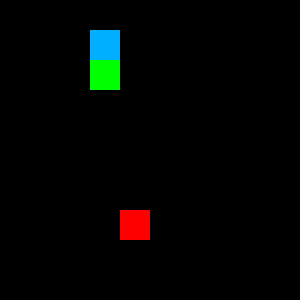

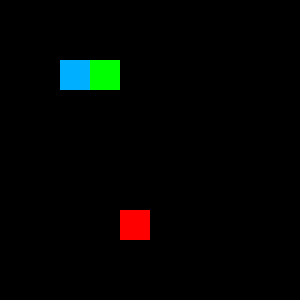

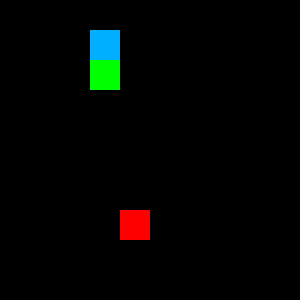

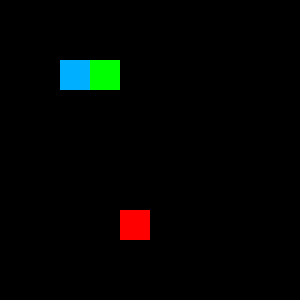

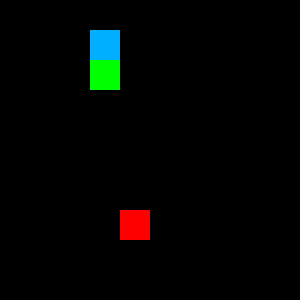

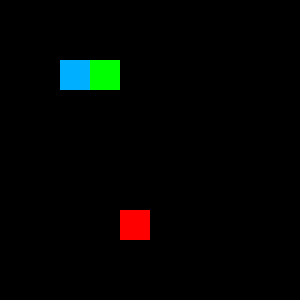

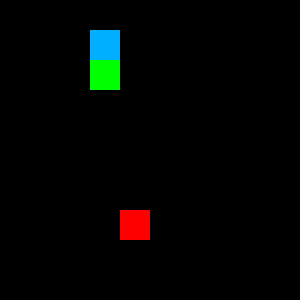

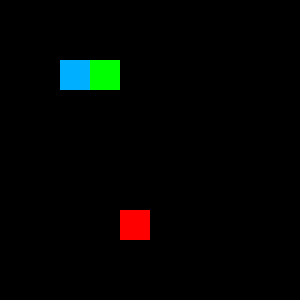

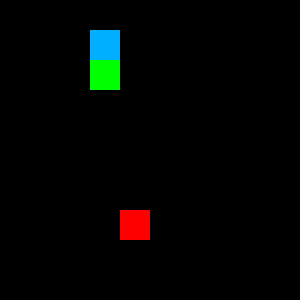

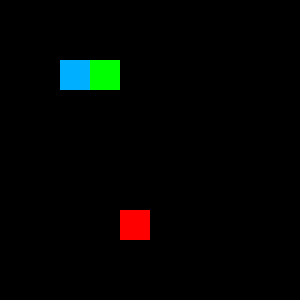

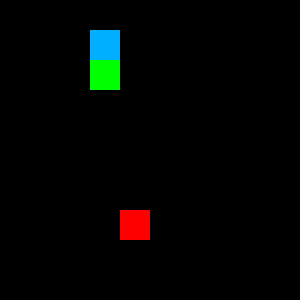

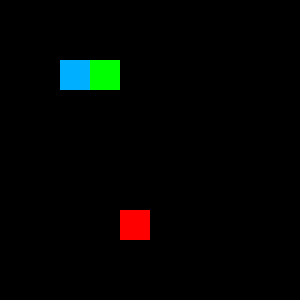

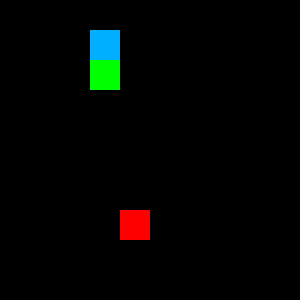

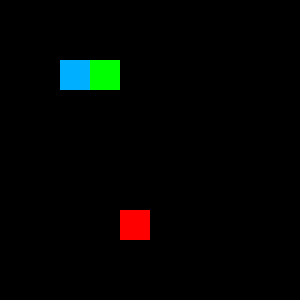

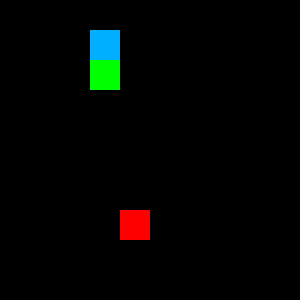

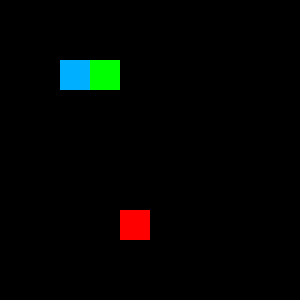

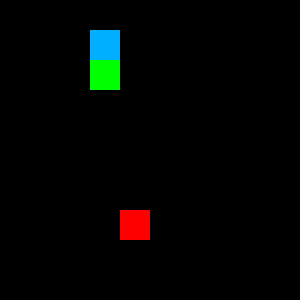

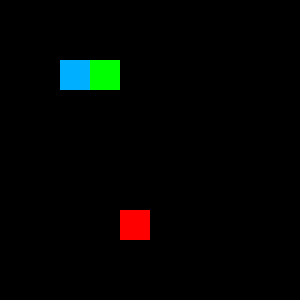

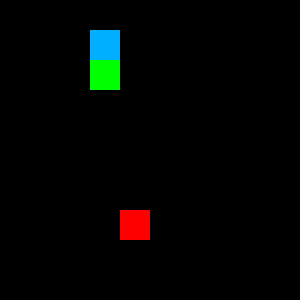

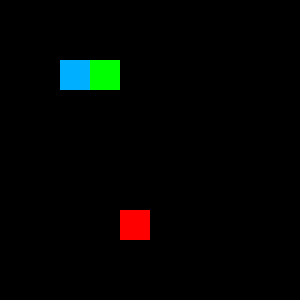

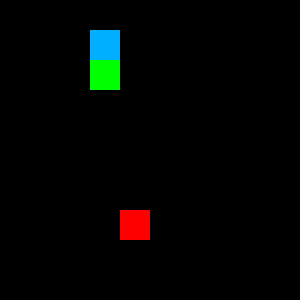

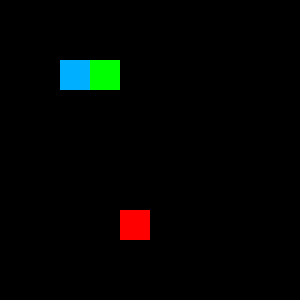

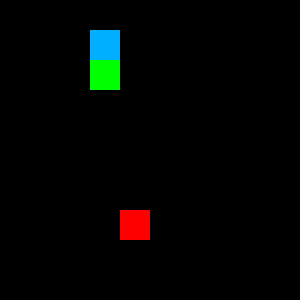

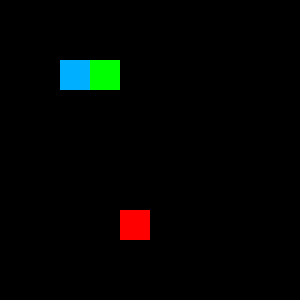

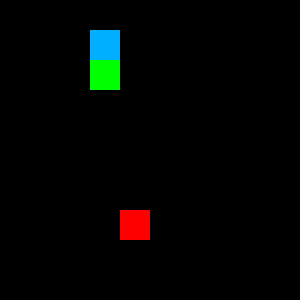

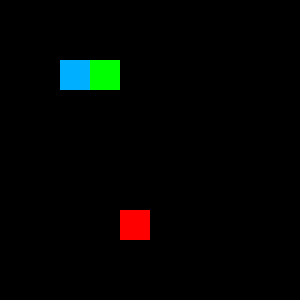

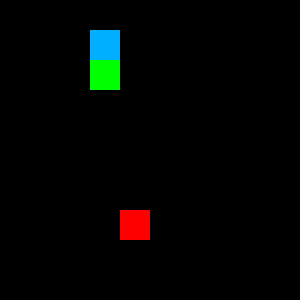

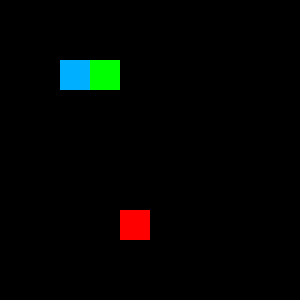

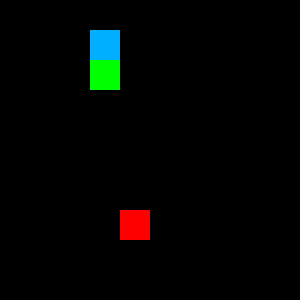

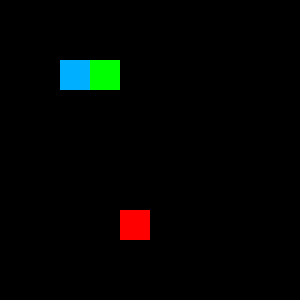

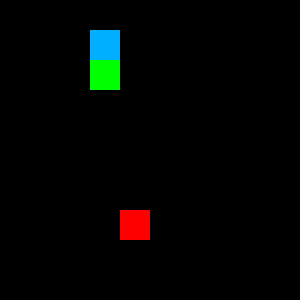

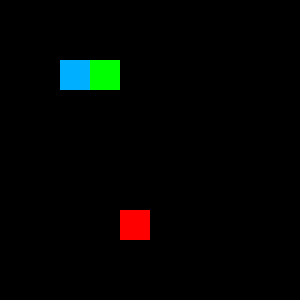

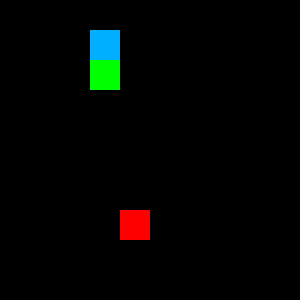

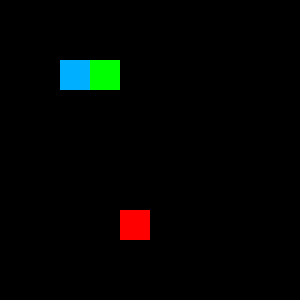

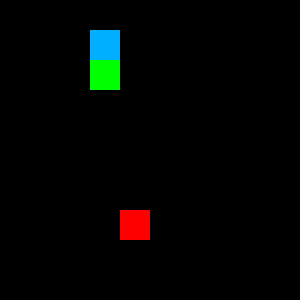

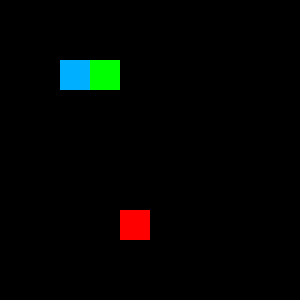

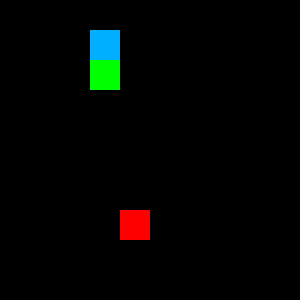

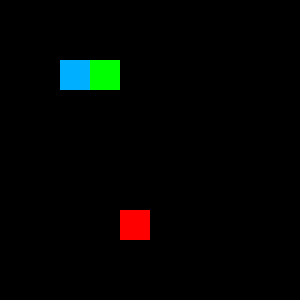

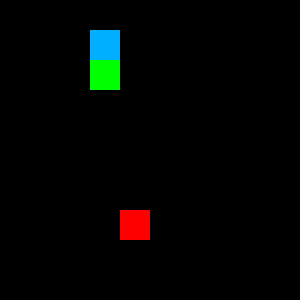

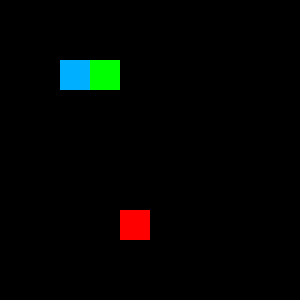

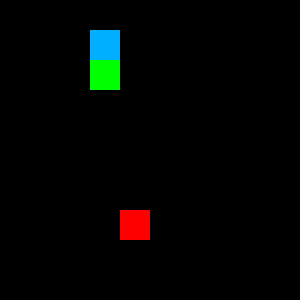

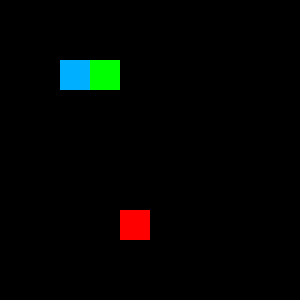

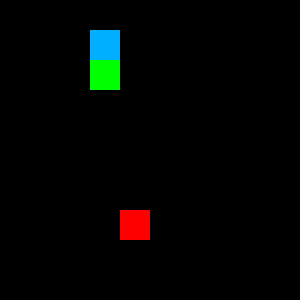

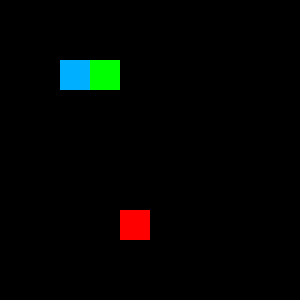

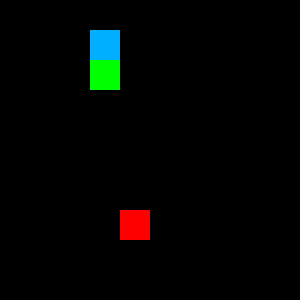

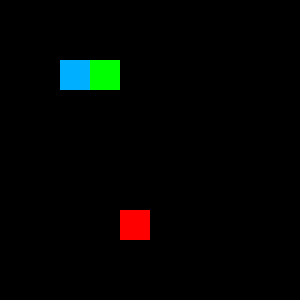

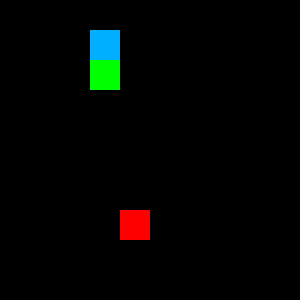

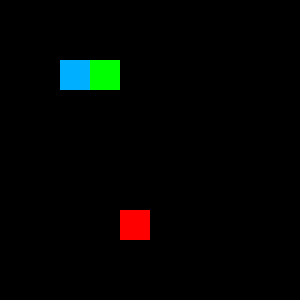

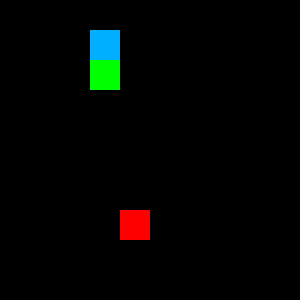

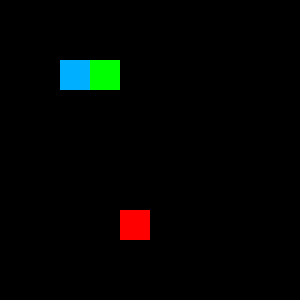

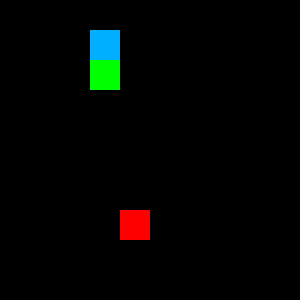

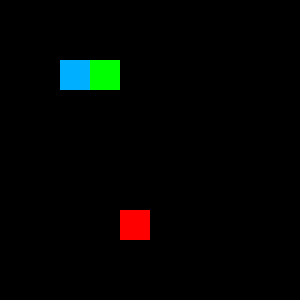

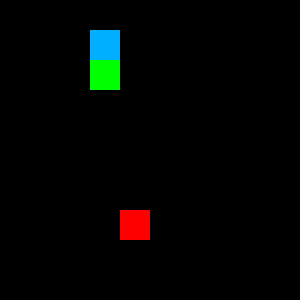

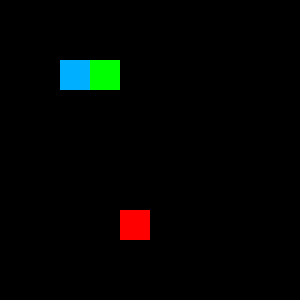

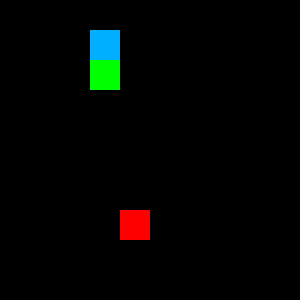

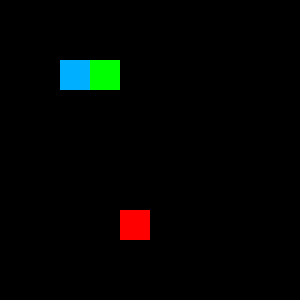

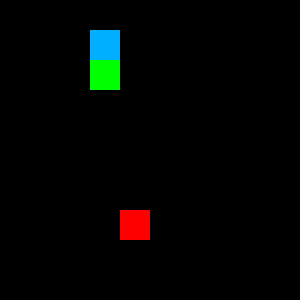

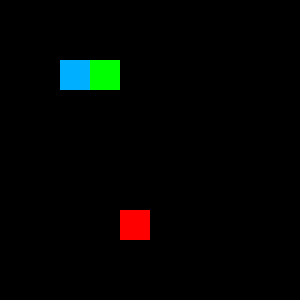

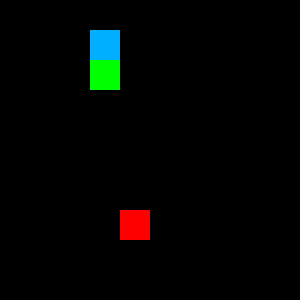

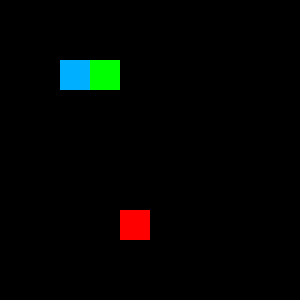

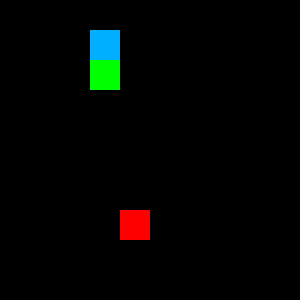

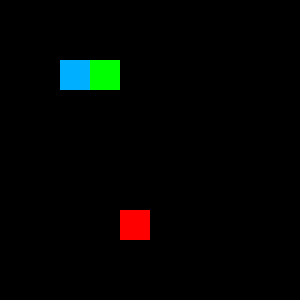

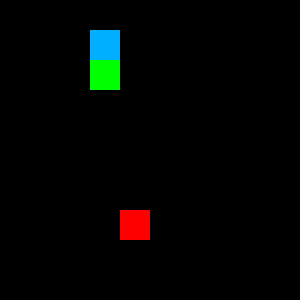

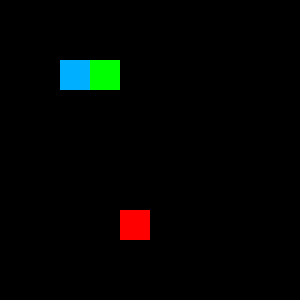

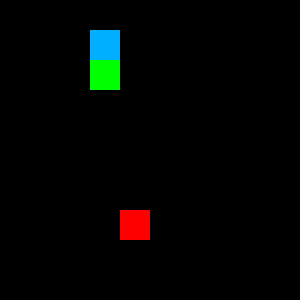

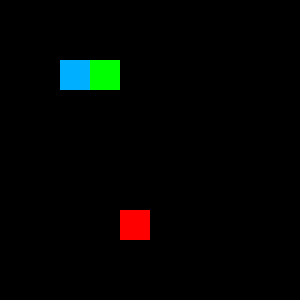

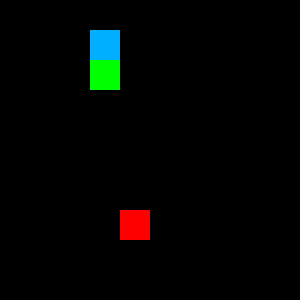

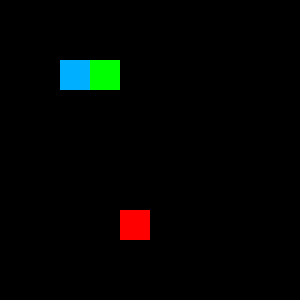

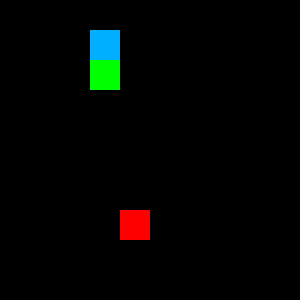

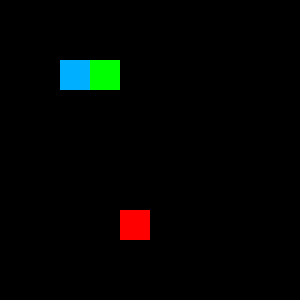

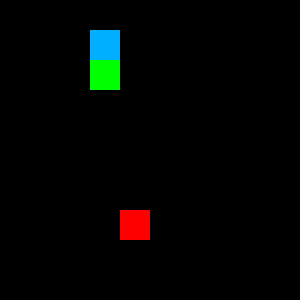

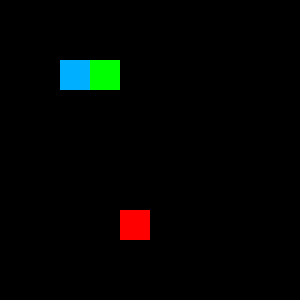

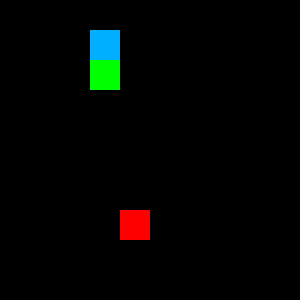

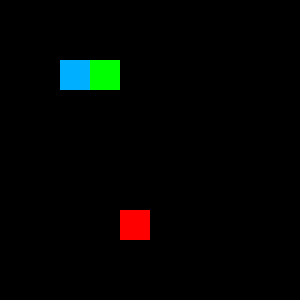

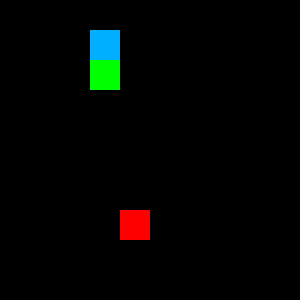

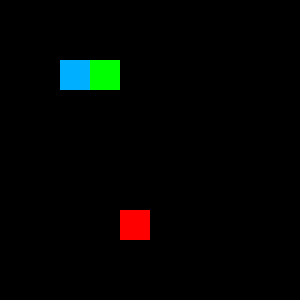

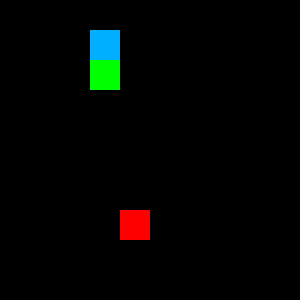

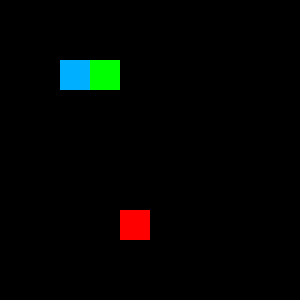

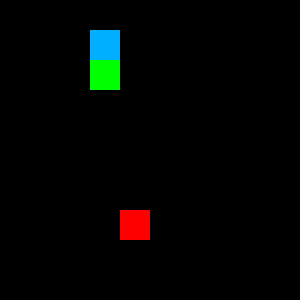

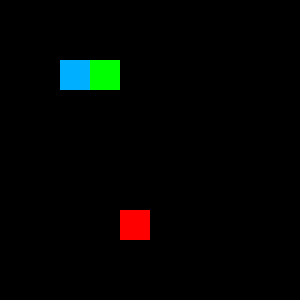

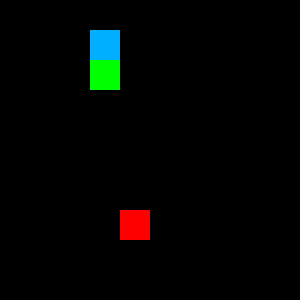

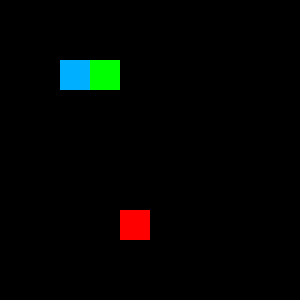

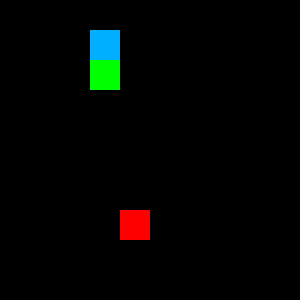

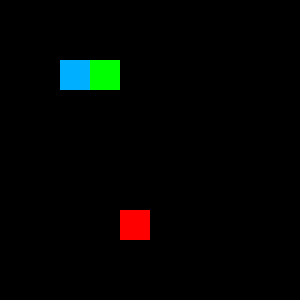

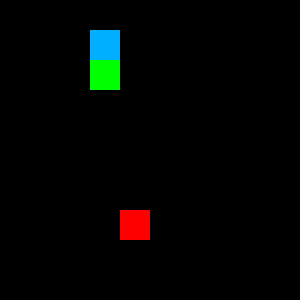

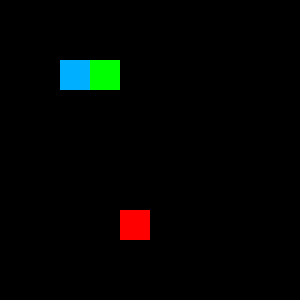

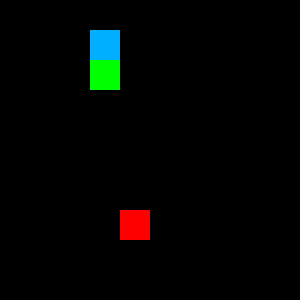

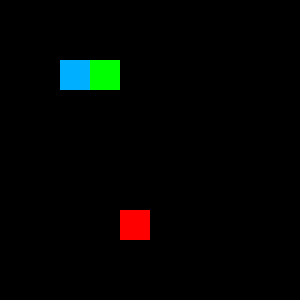

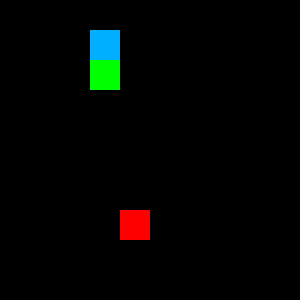

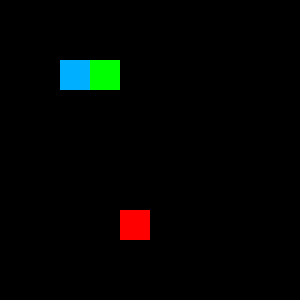

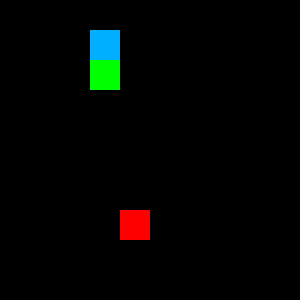

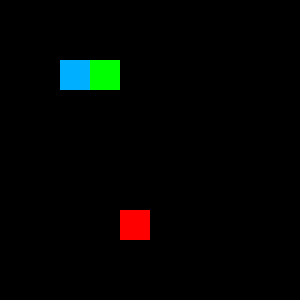

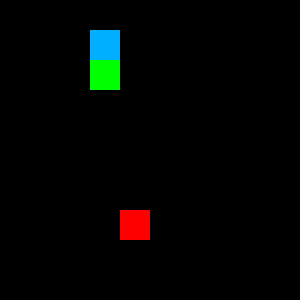

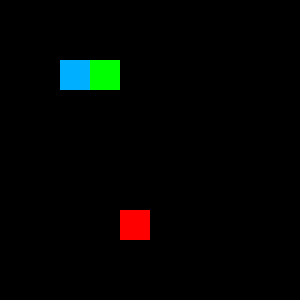

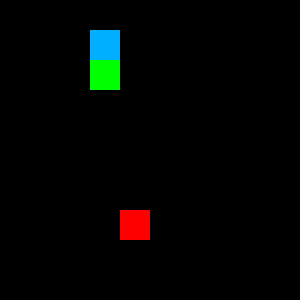

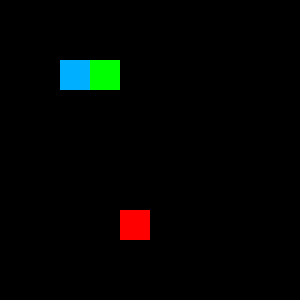

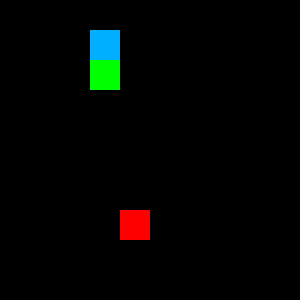

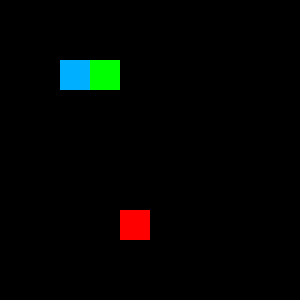

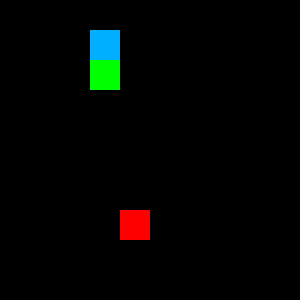

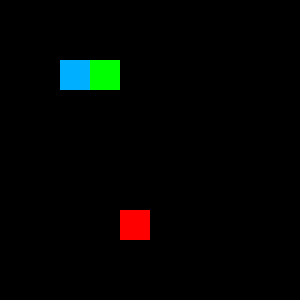

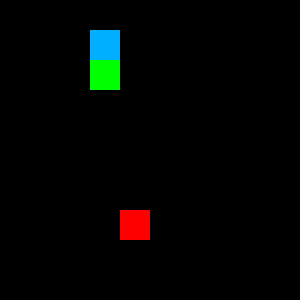

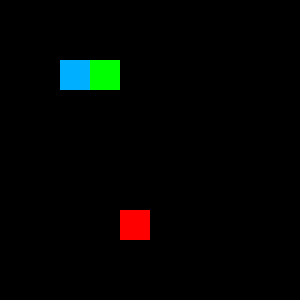

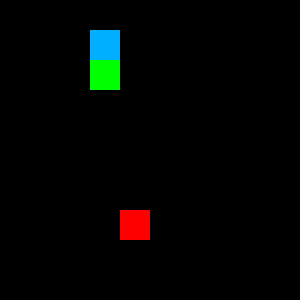

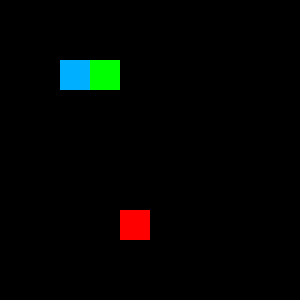

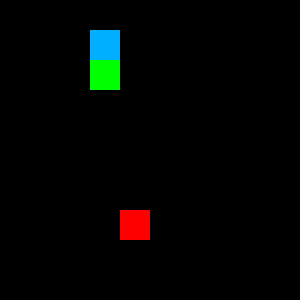

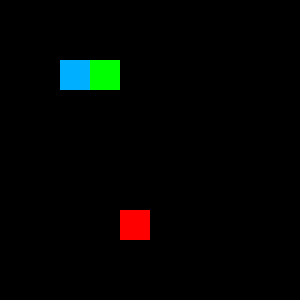

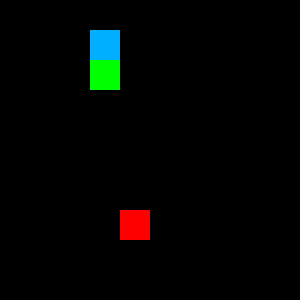

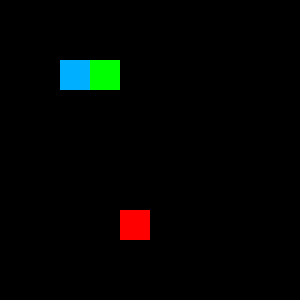

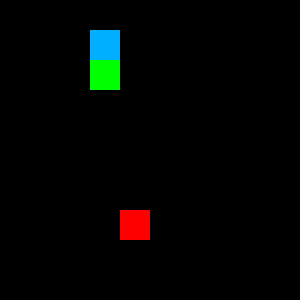

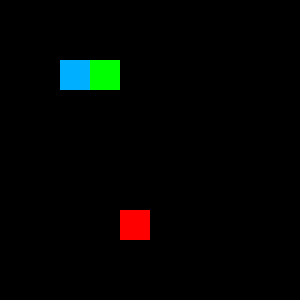

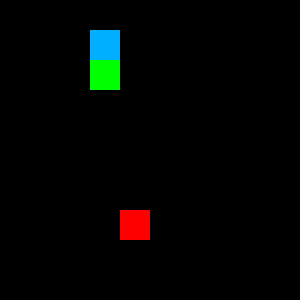

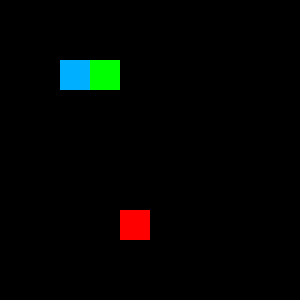

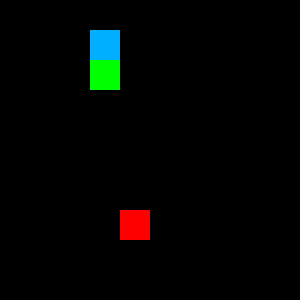

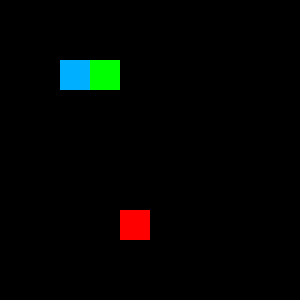

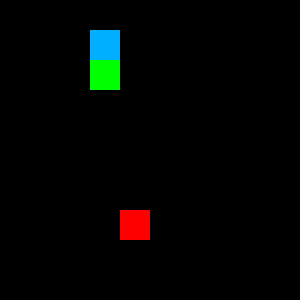

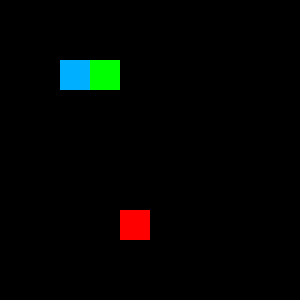

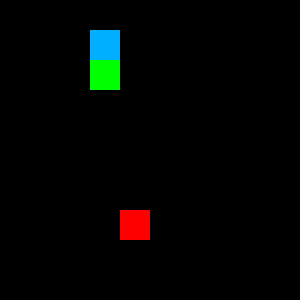

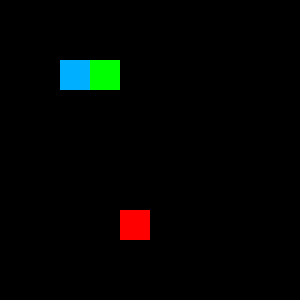

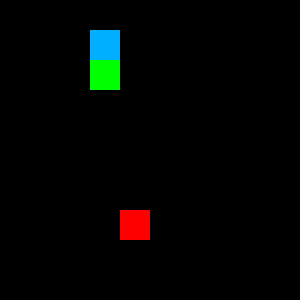

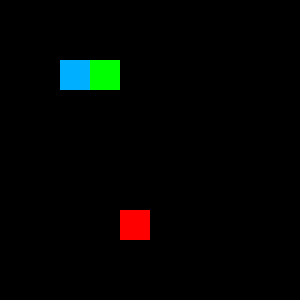

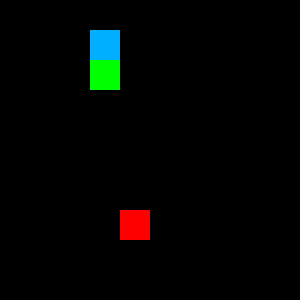

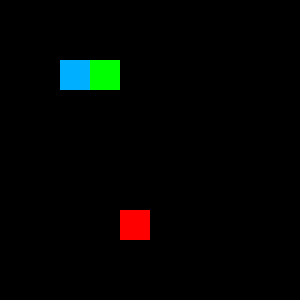

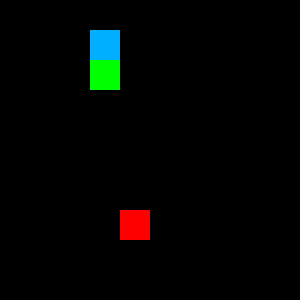

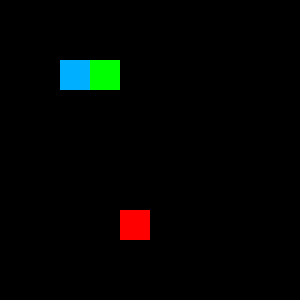

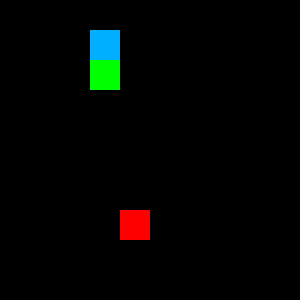

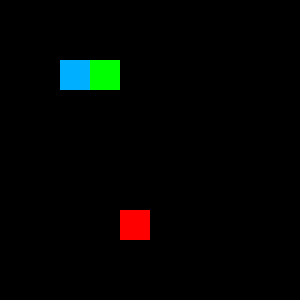

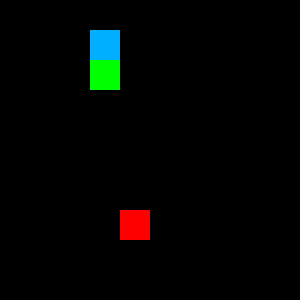

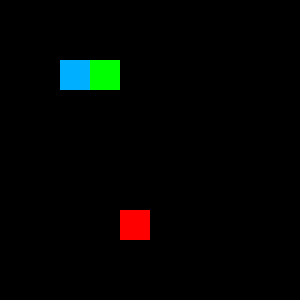

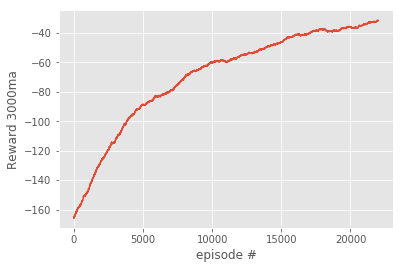

In [26]:
class Blob:
  
  def __init__(self):
    
    self.x = np.random.randint(0, SIZE)
    self.y = np.random.randint(0, SIZE)
    
  def __str__(self):
    
    return f"{self.x}, {self.y}"
  
  def __sub__(self, other):
    
    return (self.x - other.x, self.y - other.y)
  
  def move(self, x=False, y=False):
    
    if not x:
      self.x += np.random.randint(-1, 2)
    else:
      self.x += x

    if not y:
      self.y += np.random.randint(-1, 2)
    else:
      self.y += y
      
      
    if self.x < 0:
      self.x = 0
    elif self.x > SIZE-1:
      self.x = SIZE-1
      
    
    if self.y < 0:
      self.y = 0
    elif self.y > SIZE-1:
      self.y = SIZE-1
      
  
  def action(self, choice):
    if choice == 0:
      self.move(x = 1, y = 1)
    elif choice == 1:
      self.move(x = -1, y = -1)
    elif choice == 2:
      self.move(x = 1, y = -1)
    elif choice == 3:
      self.move(x = -1, y = 1)
      
      
if start_q_table is None:
  q_table = {}
  for x1 in range(-SIZE+1, SIZE):
    for y1 in range(-SIZE+1, SIZE):
      for x2 in range(-SIZE+1, SIZE):
        for y2 in range(-SIZE+1, SIZE):
          q_table[((x1, y1), (x2, y2))] = [np.random.uniform(-5, 0) for i in range(4)]
          
else:
  with open(start_q_table, 'rb') as f:
    q_table = pickle.load(f)
    

episode_rewards = []
goal_steps = 200
    
for episode in range(HM_EPISODES):
  player = Blob()
  food = Blob()
  enemy = Blob()
  
  if episode % SHOW_EVERY == 0:
    print(f"on # {episode}, episolon: {epsilon}")
    print(f"{SHOW_EVERY} ep mean {np.mean(episode_rewards[-SHOW_EVERY:])}")
    show = True
  else:
    show = False
    
  episode_reward = 0
  
  for step in range(goal_steps):
    obs = (player - food, player - enemy)
    
    if np.random.random() > epsilon:
      action = np.argmax(q_table[obs])
    else:
      action = np.random.randint(0, 4)
      
    player.action(action)
    
    #
    
    if player.x == enemy.x and player.y == enemy.y:
      reward = -ENEMY_PENALTY
      
    elif player.x == food.x and player.y == food.y:
      reward = FOOD_REWARD
      
    else:
      reward = -MOVE_PENALTY
      
    
    new_obs = (player - food, player - enemy)
    
    # start the q table updation
    
    max_future_q = np.max(q_table[new_obs])
    current_q = q_table[obs][action]
    
    if reward == FOOD_REWARD:
      new_q = FOOD_REWARD
    
    elif reward == -ENEMY_PENALTY:
      new_q = -ENEMY_PENALTY
      
    else:
      new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

    q_table[obs][action] = new_q
    
    
    # show the env
    
    if show:
      
      env = np.zeros((SIZE, SIZE, 3), dtype = np.uint8)
      env[food.y][food.x] = d[FOOD_N]
      env[enemy.y][enemy.x] = d[ENEMY_N]
      env[player.y][player.x] = d[PLAYER_N]
      
      img = Image.fromarray(env, "RGB")
      img = img.resize((300, 300))
      cv2_imshow(np.array(img))
      
      if reward == FOOD_REWARD or reward == -ENEMY_PENALTY:
        if cv2.waitKey(500) & 0xFF == ord('q'):
          break
          
      else:
        if cv2.waitKey(1) & 0xFF == ord('q'):
          break
      
    episode_reward += reward
      
    if reward == FOOD_REWARD or reward == -ENEMY_PENALTY:
      break
        
  episode_rewards.append(episode_reward)
      
  epsilon *= EPS_DECAY

moving_avg = np.convolve(episode_rewards, np.ones((SHOW_EVERY,))/SHOW_EVERY, mode='valid')

plt.plot([i for i in range(len(moving_avg))], moving_avg)
plt.ylabel(f"Reward {SHOW_EVERY}ma")
plt.xlabel("episode #")
plt.show()

# save the q table as a pickle file 
with open(f"qtable--{int(time.time())}.pickle", 'wb') as f:
  pickle.dump(q_table, f)
  
  